# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Yohanssen Pradana Pardede
- **Email:** genpdn@gmail.com
- **ID Dicoding:** yohanssen23

## Import Semua Packages/Library yang Digunakan

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
# Load datasets
customers = pd.read_csv('data/olist_customers_dataset.csv', usecols=['customer_id','customer_unique_id'])
order_items = pd.read_csv('data/olist_order_items_dataset.csv', usecols=['order_id', 'product_id', 'seller_id', 'price', 'freight_value'])
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv', usecols=['order_id', 'payment_type', 'payment_value'])
order_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv', usecols=['order_id', 'review_score'])
orders = pd.read_csv('data/olist_orders_dataset.csv', usecols=['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date'])
products = pd.read_csv('data/olist_products_dataset.csv', usecols=['product_id', 'product_category_name'])
sellers = pd.read_csv('data/olist_sellers_dataset.csv', usecols=['seller_id'])
product_translation = pd.read_csv('data/product_category_name_translation.csv', usecols=['product_category_name', 'product_category_name_english'])


In [3]:
# Menggabungkan dataset
# Langkah 1: Menggabungkan tabel orders dengan customers untuk mendapatkan informasi pelanggan
merged_data = pd.merge(orders, customers, on='customer_id', how='left')

# Langkah 2: Menggabungkan dengan order_items untuk mendapatkan informasi produk dan penjual dari setiap pesanan
merged_data = pd.merge(merged_data, order_items, on='order_id', how='left')

# Langkah 3: Menggabungkan dengan tabel products untuk mendapatkan kategori produk
merged_data = pd.merge(merged_data, products, on='product_id', how='left')

# Langkah 4: Menggabungkan dengan tabel product_translation menggunakan nama kolom yang benar
merged_data = pd.merge(merged_data, product_translation, on='product_category_name', how='left')

# Mengganti kolom product_category_name (Bahasa Portugis) dengan product_category_name_english (Bahasa Inggris)
merged_data['product_category_name'] = merged_data['product_category_name_english']

# Menghapus kolom product_category_name_english karena sudah digantikan
merged_data.drop('product_category_name_english', axis=1, inplace=True)

# Langkah 5: Menggabungkan dengan tabel sellers untuk mendapatkan informasi penjual dari setiap produk yang terjual
merged_data = pd.merge(merged_data, sellers, on='seller_id', how='left')

# Langkah 6: Menggabungkan dengan tabel order_payments untuk memasukkan informasi pembayaran
merged_data = pd.merge(merged_data, order_payments, on='order_id', how='left')

# Langkah 7: Menggabungkan dengan tabel order_reviews untuk memasukkan ulasan dan penilaian pelanggan
merged_data = pd.merge(merged_data, order_reviews, on='order_id', how='left')

# Menampilkan dataframe hasil gabungan (dibatasi beberapa baris pertama)
## print(merged_data.head())
merged_data


,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,product_id,seller_id,price,freight_value,product_category_name,payment_type,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,credit_card,18.12,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,voucher,2.00,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,voucher,18.59,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,perfumery,boleto,141.46,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,auto,credit_card,179.12,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,baby,credit_card,195.00,4.0
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,home_appliances_2,credit_card,271.01,5.0
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,computers_accessories,credit_card,441.16,2.0
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,computers_accessories,credit_card,441.16,2.0


### Assessing Data

In [4]:
# Memeriksa informasi umum tentang data
print("Informasi Umum Data:")
print(merged_data.info())

Informasi Umum Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_purchase_timestamp       119143 non-null  object 
 3   order_delivered_customer_date  115722 non-null  object 
 4   customer_unique_id             119143 non-null  object 
 5   product_id                     118310 non-null  object 
 6   seller_id                      118310 non-null  object 
 7   price                          118310 non-null  float64
 8   freight_value                  118310 non-null  float64
 9   product_category_name          116576 non-null  object 
 10  payment_type                   119140 non-null  object 
 11  payment_value                  119140 non-null  float64
 12  review_sc

In [5]:
# Memeriksa jumlah baris dan kolom
print("\nDimensi Data:")
print(f"Baris: {merged_data.shape[0]}, Kolom: {merged_data.shape[1]}")


Dimensi Data:
Baris: 119143, Kolom: 13


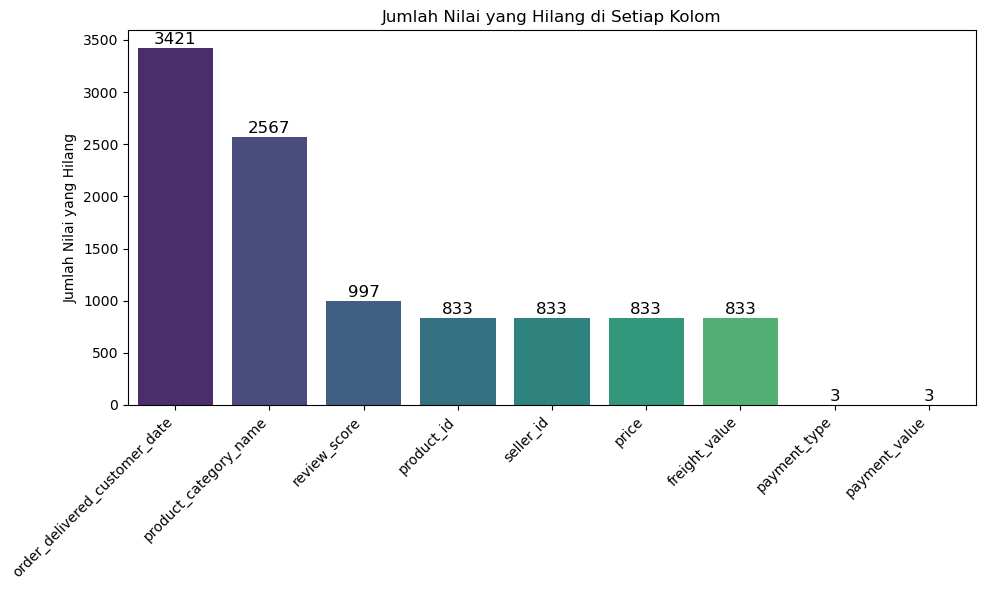

In [6]:
# Memeriksa nilai yang hilang (Missing Data)
missing_data = merged_data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Visualisasi Missing Data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")
plt.title("Jumlah Nilai yang Hilang di Setiap Kolom")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Jumlah Nilai yang Hilang')

# Menambahkan nilai pada setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

**Insight Grafik Missing Data:**

1. **order_delivered_customer_date** (3.421 nilai hilang) kemungkinan disebabkan oleh pengiriman yang belum selesai atau tidak tercatat. Data ini penting untuk dianalisis lebih lanjut karena memengaruhi pengukuran waktu pengiriman dan kepuasan pelanggan.

2. **product_category_name** (2.567 nilai hilang) menunjukkan banyak produk tanpa kategori yang dapat memengaruhi analisis produk dan segmentasi.

3. **review_score** (997 nilai hilang) dapat disebabkan oleh pelanggan yang tidak memberikan ulasan, sehingga diperlukan kampanye untuk mendorong pelanggan memberi feedback.

4. **product_id**, **seller_id**, **price**, dan **freight_value** (833 nilai hilang masing-masing) bisa terjadi karena masalah pencatatan produk atau penjual.

5. **payment_type** dan **payment_value** hanya memiliki 3 nilai hilang, dapat diatasi dengan pengisian manual.

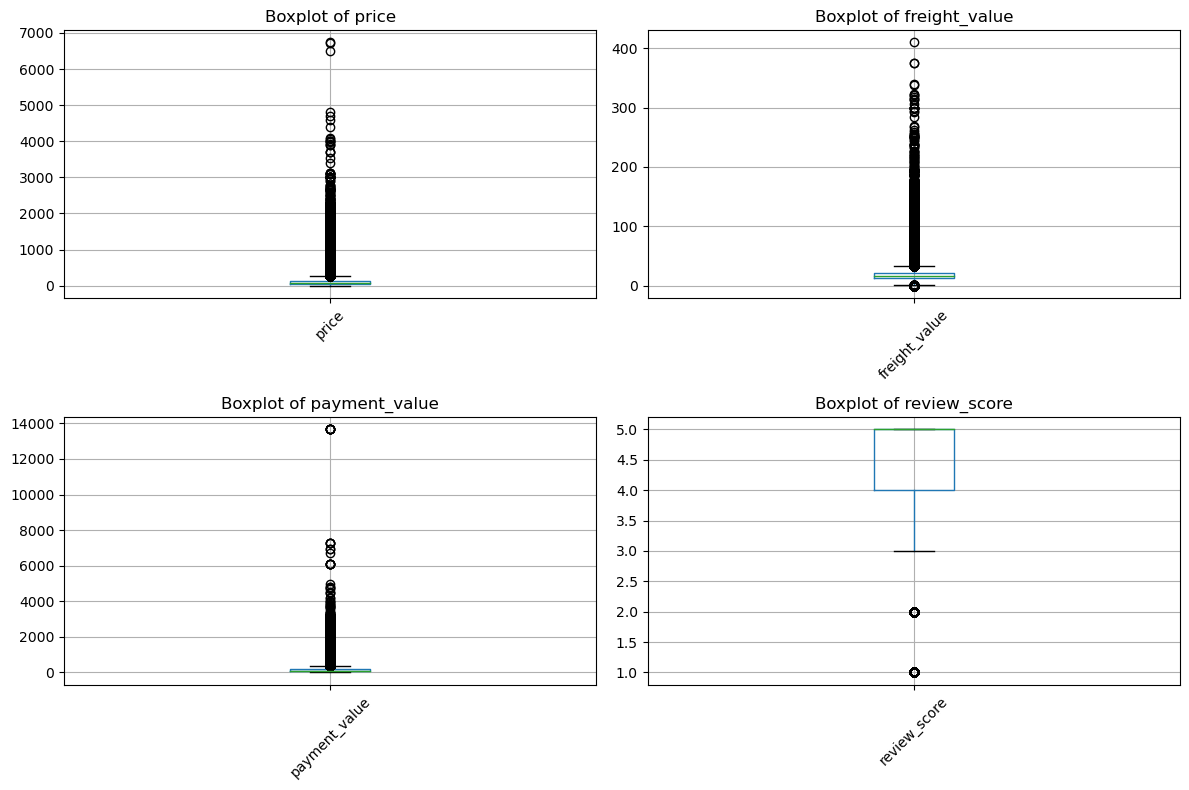

In [7]:
# Get the list of numerical columns
numerical_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure and axes
num_cols = len(numerical_cols)
rows = (num_cols // 2) + (num_cols % 2)  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Plot individual boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    merged_data.boxplot(column=[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots (if odd number of columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insight Berdasarkan Boxplot:**

1. **`price` (Harga Produk)**: Mayoritas harga produk rendah, dengan beberapa outliers mencapai 7.000, kemungkinan berasal dari produk premium/mahal.

2. **`freight_value` (Biaya Pengiriman)**: Biaya pengiriman umumnya rendah, tetapi beberapa pesanan memiliki biaya tinggi (hingga 400), mungkin karena faktor jarak atau berat produk.

3. **`payment_value` (Nilai Pembayaran)**: Nilai pembayaran umumnya rendah, tetapi terdapat beberapa outliers yang mencapai 14.000, mungkin akibat pembelian besar atau produk mahal.

4. **`review_score` (Skor Ulasan)**: Skor ulasan umumnya tinggi (4.0), meskipun ada beberapa ulasan buruk (skor 1.0).

Apakah outliers memiliki arti penting bagi bisnis? Dalam e-commerce, produk-produk mahal atau pesanan besar yang jarang terjadi masih bisa sangat relevan. Contohnya, produk mahal mungkin merupakan kategori premium atau pesanan bulk dari pelanggan perusahaan. Jika demikian, outliers sebaiknya tidak dihapus, tetapi dianalisis secara terpisah.


Jumlah Baris Duplikat: 11696


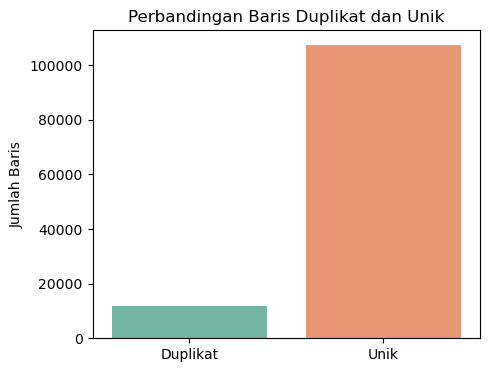

In [8]:
# Memeriksa duplikasi data
duplicate_count = merged_data.duplicated().sum()
print(f"\nJumlah Baris Duplikat: {duplicate_count}")

# Visualisasi jika ada duplikasi
if duplicate_count > 0:
    plt.figure(figsize=(5, 4))
    sns.barplot(x=["Duplikat", "Unik"], y=[duplicate_count, merged_data.shape[0] - duplicate_count], palette="Set2")
    plt.title("Perbandingan Baris Duplikat dan Unik")
    plt.ylabel("Jumlah Baris")
    plt.show()

**Insight Berdasarkan Bar Chart:**
1. **Baris Duplikat**:
   - Terlihat bahwa jumlah baris duplikat relatif kecil dibandingkan dengan total data. Baris duplikat ini dapat disebabkan oleh kesalahan pencatatan atau entri data yang berulang, sehingga perlu ditinjau lebih lanjut dan dihapus agar analisis lebih akurat.

2. **Baris Unik**:
   - Sebagian besar dataset terdiri dari baris unik yang menunjukkan bahwa mayoritas data tidak terduplikasi. Banyaknya data unik menunjukkan bahwa dataset cukup beragam dan valid untuk dianalisis lebih lanjut.

**`order_purchase_timestamp`** dan **`order_delivered_customer_date`** saat ini memiliki tipe data **object** (string) yang seharusnya diubah menjadi tipe data **datetime** untuk memudahkan analisis waktu (misalnya menghitung durasi pengiriman).

In [9]:
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['order_delivered_customer_date'] = pd.to_datetime(merged_data['order_delivered_customer_date'])

### Cleaning Data

Nilai kosong pada kolom **`order_delivered_customer_date`** diisi  dengan penanda NaT untuk menandakan bahwa pengiriman belum selesai.

In [10]:
merged_data.dropna(subset=['order_delivered_customer_date'], inplace=True)

Menghapus baris yang tidak lengkap pada kolom **`product_id`, `seller_id`, `price`, `freight_value`**

In [11]:
merged_data.dropna(subset=['product_id', 'seller_id', 'price', 'freight_value'], inplace=True)


Ada 3 pesanan yang tidak memiliki nilai pembayaran pada kolom**`payment_type`**. Hal ini bisa terjadi karena kesalahan pencatatan atau pesanan gratis (misalnya menggunakan voucher penuh).

In [12]:
merged_data.dropna(subset=['payment_value'], inplace=True)


Untuk kategori produk yang hilang pada kolom **`product_category_name`**, diganti dengan nilai  `'unknown'`.

In [13]:
merged_data['product_category_name'].fillna('unknown', inplace=True)

Jika pelanggan tidak memberikan ulasan pada kolom **`review_score`**, kolom tersebut diisi dengan nilai tengah (3).

In [14]:
merged_data['review_score'].fillna(3, inplace=True)

In [15]:
# Memeriksa nilai yang hilang (Missing Data)
missing_data = merged_data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

print("\nNilai yang Hilang di Setiap Kolom:")
print(missing_data)


Nilai yang Hilang di Setiap Kolom:
Series([], dtype: int64)


In [16]:
# Melihat contoh baris duplikat berdasarkan beberapa kolom
duplicate_rows = merged_data[merged_data.duplicated(subset=['order_id', 'product_id', 'seller_id', 'payment_value'], keep=False)]
print("Contoh baris duplikat yang terdeteksi berdasarkan 'order_id', 'product_id', 'seller_id', dan 'payment_value':")
print(duplicate_rows.head())

# Menghitung jumlah duplikat sebelum dihapus
initial_row_count = merged_data.shape[0]
duplicate_count_before = merged_data.duplicated(subset=['order_id', 'product_id', 'seller_id', 'payment_value']).sum()

# Menghapus duplikat berdasarkan kolom 'order_id', 'product_id', 'seller_id', dan 'payment_value'
merged_data = merged_data.drop_duplicates(subset=['order_id', 'product_id', 'seller_id', 'payment_value'], keep='first')

# Menghitung jumlah baris setelah penghapusan duplikat
final_row_count = merged_data.shape[0]
duplicate_count_after = merged_data.duplicated(subset=['order_id', 'product_id', 'seller_id', 'payment_value']).sum()

# Menampilkan jumlah duplikat yang dihapus
rows_removed = initial_row_count - final_row_count
print(f"\nJumlah data duplikat yang dihapus: {rows_removed}")
print(f"\nJumlah baris setelah menghapus duplikat: {final_row_count}")
print(f"\nJumlah baris duplikat setelah pembersihan: {duplicate_count_after}")


Contoh baris duplikat yang terdeteksi berdasarkan 'order_id', 'product_id', 'seller_id', dan 'payment_value':
                            order_id                       customer_id  \
13  e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
14  e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
59  9faeb9b2746b9d7526aef5acb08e2aa0  79183cd650e2bb0d475b0067d45946ac   
60  9faeb9b2746b9d7526aef5acb08e2aa0  79183cd650e2bb0d475b0067d45946ac   
65  66e4624ae69e7dc89bd50222b59f581f  684fa6da5134b9e4dab731e00011712d   

   order_purchase_timestamp order_delivered_customer_date  \
13      2017-05-16 19:41:10           2017-05-29 11:18:31   
14      2017-05-16 19:41:10           2017-05-29 11:18:31   
59      2018-07-26 14:39:59           2018-07-31 22:26:55   
60      2018-07-26 14:39:59           2018-07-31 22:26:55   
65      2018-03-09 14:50:15           2018-04-03 13:28:46   

                  customer_unique_id                        product_id  \
13  

## Exploratory Data Analysis (EDA)

In [17]:
print(merged_data.describe())

               price  freight_value  payment_value   review_score
count  104058.000000  104058.000000  104058.000000  104058.000000
mean      123.756874      20.099324     157.422392       4.116666
std       188.385502      15.805615     217.559575       1.310203
min         0.850000       0.000000       0.000000       1.000000
25%        40.000000      13.140000      58.232500       4.000000
50%        78.000000      16.340000     102.780000       5.000000
75%       138.900000      21.220000     176.230000       5.000000
max      6735.000000     409.680000   13664.080000       5.000000


In [18]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104058 entries, 0 to 119142
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104058 non-null  object        
 1   customer_id                    104058 non-null  object        
 2   order_purchase_timestamp       104058 non-null  datetime64[ns]
 3   order_delivered_customer_date  104058 non-null  datetime64[ns]
 4   customer_unique_id             104058 non-null  object        
 5   product_id                     104058 non-null  object        
 6   seller_id                      104058 non-null  object        
 7   price                          104058 non-null  float64       
 8   freight_value                  104058 non-null  float64       
 9   product_category_name          104058 non-null  object        
 10  payment_type                   104058 non-null  object        
 11  

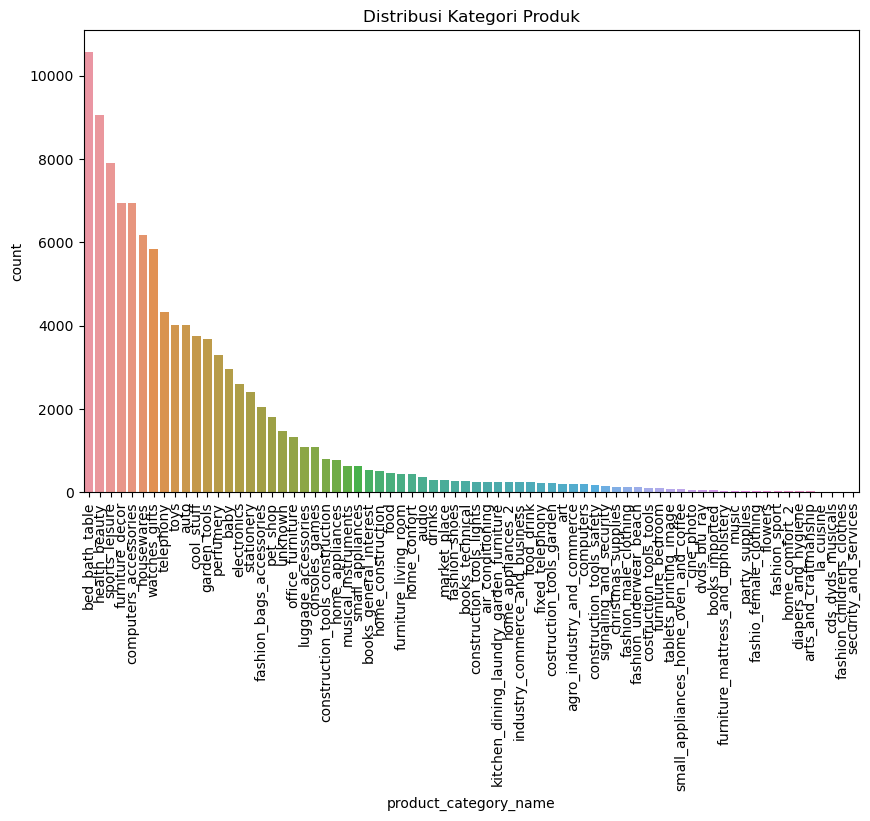

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='product_category_name', order=merged_data['product_category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribusi Kategori Produk')
plt.show()

**Insight Grafik Distribusi Kategori Produk**

1. **Kategori Paling Populer:** Kategori **bed_bath_table** merupakan kategori produk dengan jumlah transaksi terbanyak, diikuti oleh **health_beauty** dan **sports_leisure**. Grafik ini menunjukkan bahwa produk dalam kategori rumah tangga dan kesehatan memiliki permintaan yang tinggi.
   
2. **Distribusi yang Tidak Merata:** Terlihat distribusi produk sangat tidak merata. Beberapa kategori produk memiliki jumlah transaksi yang sangat tinggi, sementara banyak kategori lainnya memiliki jumlah transaksi yang sangat rendah.
   
3. **Long Tail Distribution:**Grafik ini merupakan contoh dari **long tail distribution**, di mana sebagian kecil kategori (kategori teratas) menyumbang sebagian besar transaksi, sementara banyak kategori lainnya hanya menyumbang sedikit transaksi. Beberapa kategori memiliki jumlah transaksi yang sangat kecil atau bahkan hanya satu transaksi.

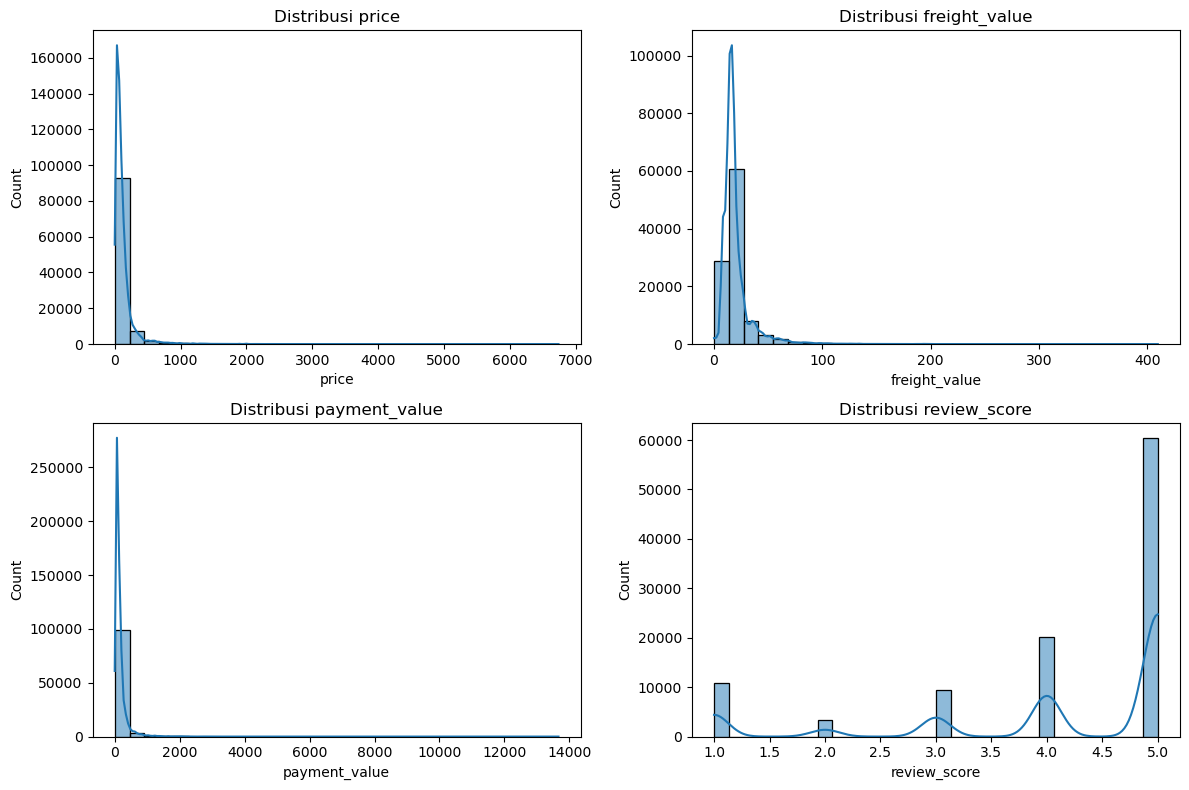

In [20]:
# Melihat sampel data untuk memeriksa apakah data terlihat normal
# Visualisasi distribusi beberapa variabel numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols[:4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(merged_data[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

**Insight Grafik Distribusi**

1. **Distribusi `price` (Harga Produk)**: Sebagian besar produk memiliki harga rendah, dengan puncak distribusi di bawah 500. Namun, ada **outliers** dengan harga sangat tinggi, mencapai hingga 7.000. Produk yang sangat mahal adalah **outliers** dan mungkin tergolong produk mewah, sementara sebagian besar produk dijual dengan harga rendah hingga menengah.

2. **Distribusi `freight_value` (Biaya Pengiriman)**: Sebagian besar biaya pengiriman berada di bawah 50, dengan puncak distribusi di rentang biaya yang sangat rendah. Beberapa **outliers** mencapai biaya pengiriman lebih dari 400. Sebagian besar transaksi memiliki biaya pengiriman rendah, tetapi biaya pengiriman yang tinggi mungkin terkait dengan pengiriman ke lokasi jauh atau pengiriman barang besar.

3. **Distribusi `payment_value` (Nilai Pembayaran)**: Distribusi mirip dengan `price`, di mana sebagian besar transaksi memiliki nilai pembayaran rendah, namun ada **outliers** hingga 14.000. Pesanan dengan nilai pembayaran tinggi kemungkinan melibatkan pembelian produk mahal atau beberapa produk dalam satu transaksi.

4. **Distribusi `review_score` (Skor Ulasan)**: Distribusi skor ulasan menunjukkan bahwa sebagian besar pelanggan memberikan skor **4 atau 5**. Terdapat sedikit skor rendah, tetapi lebih banyak pelanggan puas. Sebagian besar pelanggan tampaknya puas dengan pembelian mereka, tetapi ulasan rendah masih ada dan dapat mencerminkan masalah dengan produk atau pengiriman tertentu.

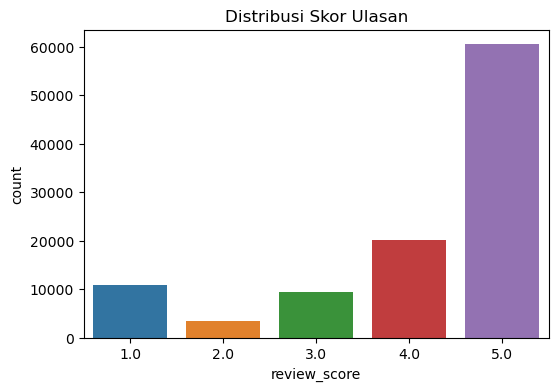

In [21]:
# Memeriksa Distribusi Nilai Kolom Skor Ulasan
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_data, x='review_score')
plt.title('Distribusi Skor Ulasan')
plt.show()

**Insight Grafik Distribusi Skor Ulasan**

1. **Mayoritas Ulasan Positif (Skor 5.0):** Sebagian besar ulasan memiliki skor **5.0** yang menandakan bahwa mayoritas pelanggan merasa sangat puas dengan produk yang mereka beli.
   
2. **Skor Ulasan di Bawah 3.0 Relatif Rendah:** Ulasan dengan skor **1.0** dan **2.0** cukup rendah, menunjukkan bahwa hanya sebagian kecil pelanggan yang merasa sangat tidak puas dengan produk atau layanan.
   
3. **Distribusi Ulasan Sedang (Skor 3.0 dan 4.0):** Skor **3.0** dan **4.0** memiliki frekuensi yang lebih rendah dibandingkan skor **5.0**, tetapi masih cukup signifikan. Ini menunjukkan bahwa ada beberapa pelanggan yang cukup puas (skor 4.0), sementara yang lainnya merasa pengalaman mereka sedang-sedang saja (skor 3.0).

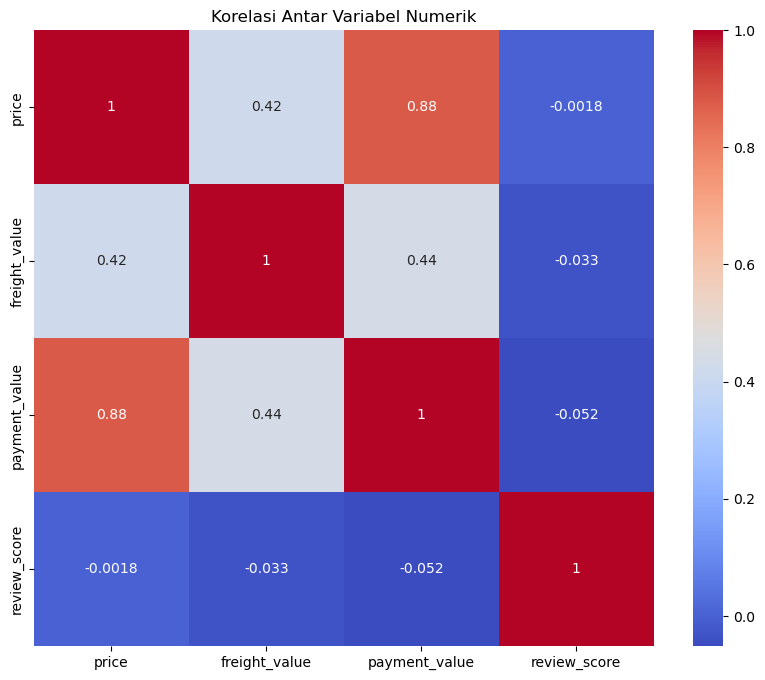

In [22]:

plt.figure(figsize=(10, 8))
sns.heatmap(merged_data[['price', 'freight_value', 'payment_value', 'review_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

**Insight Matriks Korelasi antar Variabel Numerik**
1. **Korelasi Tinggi antara `price` dan `payment_value` (0.88):** Terdapat korelasi positif yang sangat kuat antara harga produk (`price`) dan nilai pembayaran (`payment_value`). Hal ini berarti semakin tinggi harga produk, semakin besar nilai pembayaran yang harus dilakukan oleh pelanggan.

2. **Korelasi Sedang antara `price` dan `freight_value` (0.42):** Ada korelasi sedang antara harga produk (`price`) dan biaya pengiriman (`freight_value`). Hal ini mengindikasikan bahwa produk yang lebih mahal cenderung memiliki biaya pengiriman yang lebih tinggi, meskipun tidak selalu.

3. **Korelasi Rendah antara `review_score` dan Variabel Lain:** Korelasi antara skor ulasan (`review_score`) dan variabel numerik lainnya (seperti harga, biaya pengiriman, dan nilai pembayaran) sangat rendah, bahkan mendekati nol. Hal ini menunjukkan bahwa skor ulasan yang diberikan pelanggan tidak berkaitan langsung dengan harga, biaya pengiriman, atau total pembayaran yang dilakukan.

4. **Korelasi Sedang antara `freight_value` dan `payment_value` (0.44):** Biaya pengiriman (`freight_value`) memiliki korelasi sedang dengan nilai pembayaran (`payment_value`). Hal ini menunjukkan bahwa sebagian nilai pembayaran juga dipengaruhi oleh biaya pengiriman, tetapi korelasinya tidak sekuat harga produk.

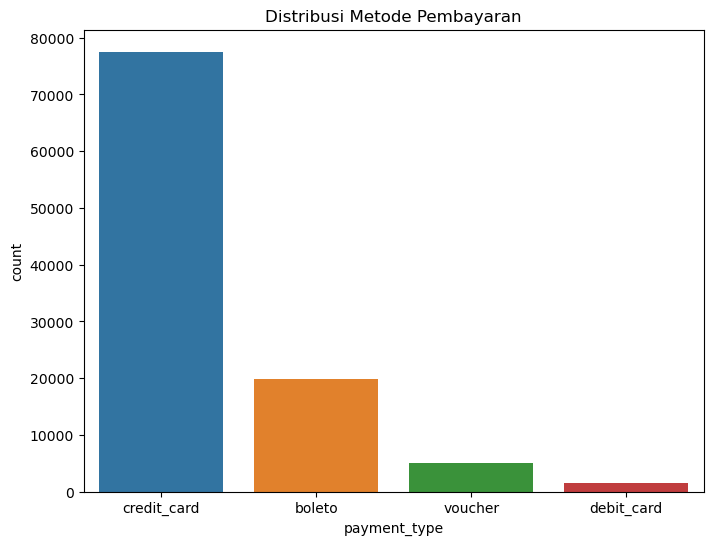

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_data, x='payment_type', order=merged_data['payment_type'].value_counts().index)
plt.title('Distribusi Metode Pembayaran')
plt.show()

Berdasarkan grafik di atas, diketahui:
1. **Dominasi Kartu Kredit:**
   - **Kartu kredit** adalah metode pembayaran yang paling dominan, dengan lebih dari 75.000 transaksi menggunakan metode ini. Hal ini menunjukkan bahwa pelanggan lebih sering menggunakan kartu kredit untuk melakukan pembelian, mungkin karena fleksibilitas dalam pembayaran atau adanya program reward dari bank.

2. **Boleto sebagai Metode Alternatif:**
   - Metode **boleto**, sejenis sistem pembayaran di Brasil, adalah metode kedua yang paling banyak digunakan. Hal ini menunjukkan adanya pelanggan yang mungkin lebih suka menggunakan metode pembayaran ini dibandingkan kartu kredit, mungkin karena kemudahan atau ketersediaannya di area tertentu.

3. **Voucher dan Kartu Debit:**
   - **Voucher** dan **kartu debit** adalah metode yang paling sedikit digunakan, dengan jumlah transaksi yang jauh lebih rendah dibandingkan kartu kredit dan boleto. Hal ini menunjukkan bahwa pelanggan lebih memilih metode kredit atau sistem pembayaran cicilan dibandingkan pembayaran langsung dengan kartu debit atau voucher.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren volume penjualan dari waktu ke waktu (bulanan/tahunan)?

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_21620\190362957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['order_month_year'] = merged_data['order_purchase_timestamp'].dt.to_period('M')


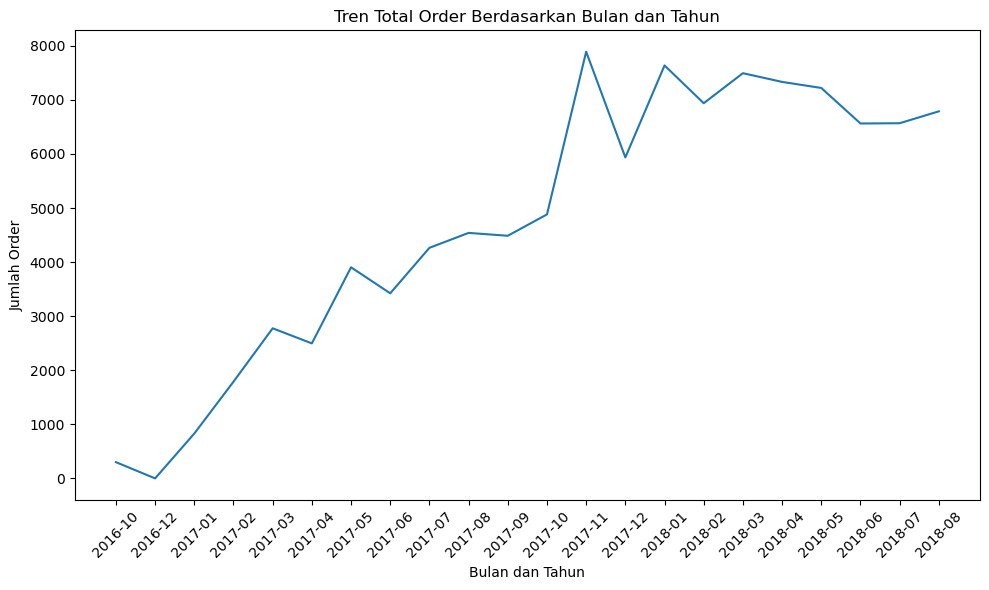

In [24]:
# Membuat kolom baru untuk bulan dan tahun dari tanggal pesanan
merged_data['order_month_year'] = merged_data['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah pesanan per bulan dan tahun
monthly_order_trend = merged_data.groupby('order_month_year').size()

# Visualisasi tren total pesanan dari waktu ke waktu
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_order_trend.index.astype(str), y=monthly_order_trend.values)
plt.title("Tren Total Order Berdasarkan Bulan dan Tahun")
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Jumlah Order")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, diketahui:

1. Pada awal tahun 2017, terlihat peningkatan yang signifikan dalam jumlah order. Penjualan mengalami lonjakan pesat antara Januari dan Mei 2017.

2. Selama paruh kedua tahun 2017, penjualan terus meningkat hingga mencapai puncaknya pada Oktober-November 2017. Ada sedikit penurunan setelah itu tetapi masih tetap stabil pada angka yang relatif tinggi hingga akhir tahun.

3. Bulan November 2017 menunjukkan puncak jumlah order yang mungkin terkait dengan promosi besar atau periode belanja seperti Black Friday atau liburan akhir tahun.

4. Pada awal 2018, volume penjualan menunjukkan tren yang relatif stabil. Meskipun ada penurunan setelah puncak di awal tahun, penjualan tetap cukup konsisten sepanjang pertengahan tahun 2018.

### Pertanyaan 2: Bagaimana tren volume penjualan dari waktu ke waktu (Mingguan/Harian)?

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_21620\777569843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_21620\777569843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['day_of_week'] = merged_data['order_purchase_timestamp'].dt.day_name()
C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_21620\777569843.py:15: SettingWithCopyWarning: 


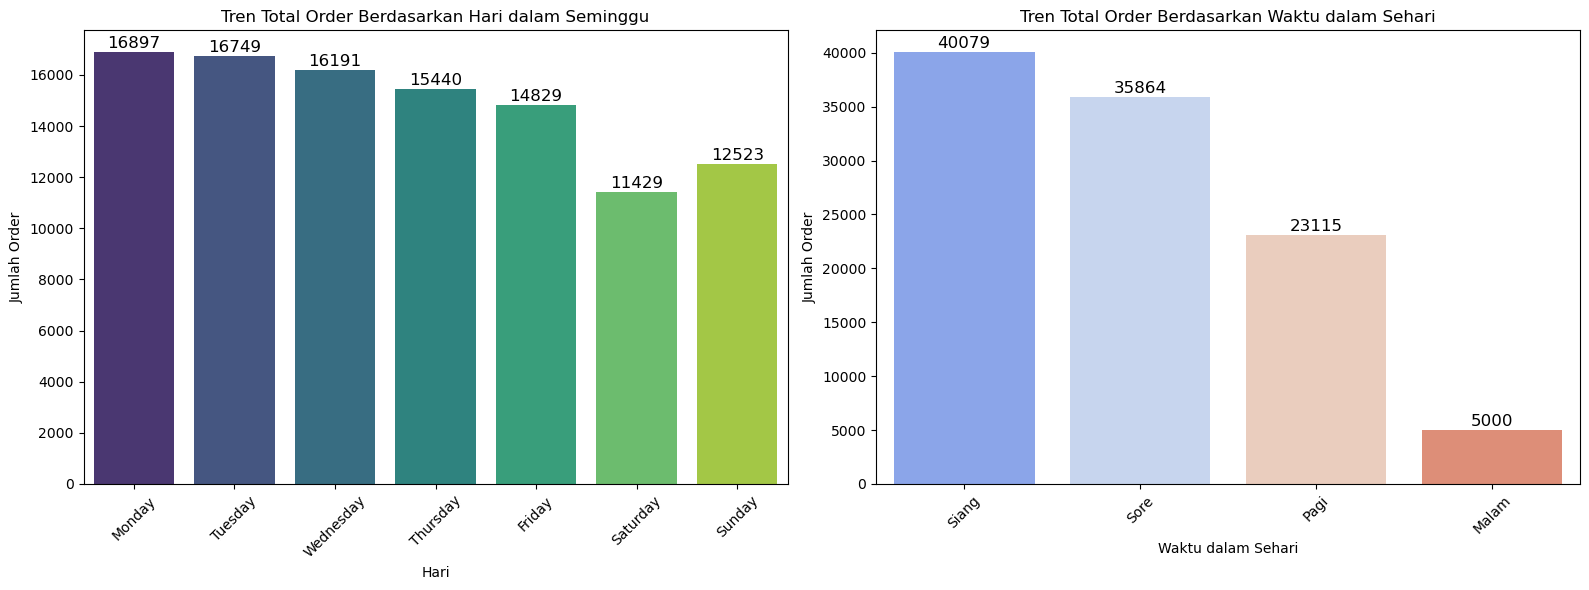

In [25]:
# Pastikan kolom 'order_purchase_timestamp' dalam format datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Mengambil nama hari dari kolom tanggal
merged_data['day_of_week'] = merged_data['order_purchase_timestamp'].dt.day_name()

# Menghitung jumlah pesanan berdasarkan hari dalam seminggu
daily_order_trend = merged_data.groupby('day_of_week')['order_id'].count()

# Mengurutkan hari dalam seminggu agar Senin muncul duluan
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_order_trend = daily_order_trend.reindex(days_order)

# Membuat kolom baru untuk jam dari waktu pesanan
merged_data['order_hour'] = merged_data['order_purchase_timestamp'].dt.hour

# Mengklasifikasikan waktu pesanan ke dalam kategori pagi, siang, sore, dan malam
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    elif 18 <= hour < 24:
        return 'Sore'
    else:
        return 'Malam'

merged_data['time_of_day'] = merged_data['order_hour'].apply(time_of_day)

# Menghitung jumlah pesanan per kategori waktu dalam sehari
time_of_day_order_trend = merged_data['time_of_day'].value_counts()

# Membuat subplots untuk kedua grafik dalam satu baris
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Tren Total Order Berdasarkan Hari dalam Seminggu
ax1 = sns.barplot(x=daily_order_trend.index, y=daily_order_trend.values, palette="viridis", ax=axes[0])

# Menampilkan nilai di setiap bar untuk plot 1
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                 textcoords='offset points')

ax1.set_title("Tren Total Order Berdasarkan Hari dalam Seminggu")
ax1.set_xlabel("Hari")
ax1.set_ylabel("Jumlah Order")
ax1.set_xticklabels(daily_order_trend.index, rotation=45)

# Plot 2: Tren Total Order Berdasarkan Waktu dalam Sehari
ax2 = sns.barplot(x=time_of_day_order_trend.index, y=time_of_day_order_trend.values, palette="coolwarm", ax=axes[1])

# Menampilkan nilai di setiap bar untuk plot 2
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3),
                 textcoords='offset points')

ax2.set_title("Tren Total Order Berdasarkan Waktu dalam Sehari")
ax2.set_xlabel("Waktu dalam Sehari")
ax2.set_ylabel("Jumlah Order")
ax2.set_xticklabels(time_of_day_order_trend.index, rotation=45)

# Menyesuaikan layout agar tampilan tidak tumpang tindih
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, diketahui:

1. **Tren Berdasarkan Hari dalam Seminggu**:
   - **Senin dan Selasa** merupakan hari dengan jumlah order tertinggi, dengan Senin mencapai puncak sekitar 16.897 order dan Selasa sedikit di bawahnya dengan 16.749 order.
   -  Volume penjualan pada **Akhir Pekan (Sabtu dan Minggu)** menurun pada hari Sabtu dengan 11.429 order, namun kembali naik pada hari Minggu dengan 12.523 order.
   - **Hari Rabu, Kamis, dan Jumat** memiliki volume order yang relatif stabil tetapi sedikit lebih rendah dari Senin dan Selasa dengan Rabu sebesar 16.191 dan Kamis sebesar 15.440 order.

2. **Tren Berdasarkan Waktu dalam Sehari**:
   - **Siang (Puncak Penjualan)** adalah saat dengan jumlah order terbanyak, mencapai 40.079 order.
   - Penjualan menurun pada **Sore Hari** tetapi tetap tinggi dengan 35.864 order.
   - Penjualan **Pagi Hari** lebih rendah dibandingkan dengan siang dan sore, dengan 23.115 order.
   - Penjualan pada **Malam Hari** menunjukkan volume penjualan terendah, hanya 5.000 order.

### Pertanyaan 3: Bagaimana rata-rata skor rating per kategori produk dari pelanggan?

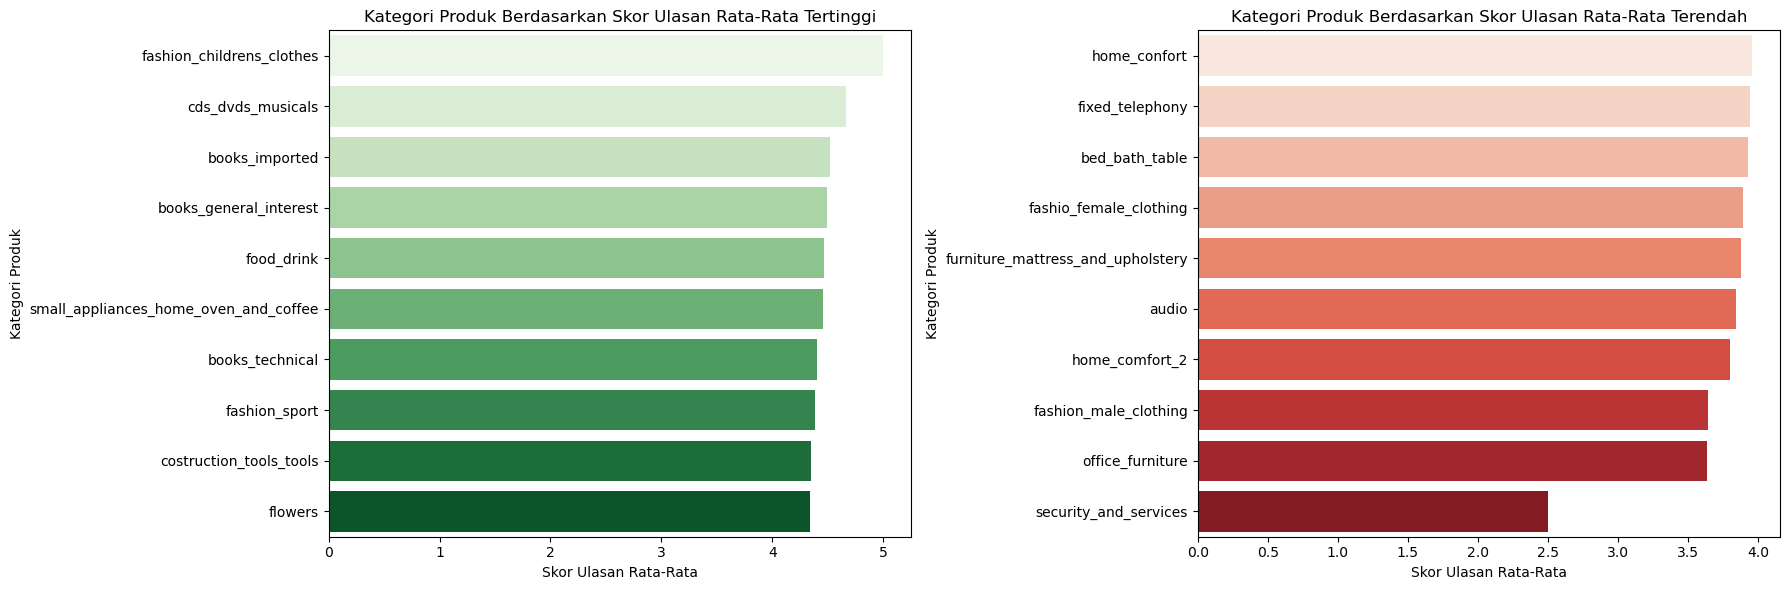

In [26]:
# 3. Rata-Rata Skor Ulasan Berdasarkan Kategori Produk
avg_review_per_category = merged_data.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)
# print("\nRata-rata Skor Ulasan per Kategori:")
# print(avg_review_per_category)

# Top 10 Kategori berdasarkan skor ulasan rata-rata
top_10_categories_by_review = avg_review_per_category.head(10)

# Mengambil 10 kategori dengan skor ulasan rata-rata terendah
bottom_10_categories_by_review = avg_review_per_category.tail(10)

# Membuat visualisasi untuk skor ulasan tertinggi dan terendah
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot untuk kategori dengan skor ulasan tertinggi
sns.barplot(x=top_10_categories_by_review.values, y=top_10_categories_by_review.index, palette="Greens", ax=axes[0])
axes[0].set_title("Kategori Produk Berdasarkan Skor Ulasan Rata-Rata Tertinggi")
axes[0].set_xlabel("Skor Ulasan Rata-Rata")
axes[0].set_ylabel("Kategori Produk")

# Plot untuk kategori dengan skor ulasan terendah
sns.barplot(x=bottom_10_categories_by_review.values, y=bottom_10_categories_by_review.index, palette="Reds", ax=axes[1])
axes[1].set_title("Kategori Produk Berdasarkan Skor Ulasan Rata-Rata Terendah")
axes[1].set_xlabel("Skor Ulasan Rata-Rata")
axes[1].set_ylabel("Kategori Produk")

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, diketahui:

**1. Kategori dengan Skor Ulasan Tertinggi (Kiri)**
   - **Fashion_childrens_clothes** menempati peringkat pertama dengan skor ulasan rata-rata tertinggi. Hal ini menunjukkan bahwa pelanggan sangat puas dengan produk-produk di kategori pakaian anak-anak, kemungkinan karena kualitas yang baik dan harga yang sesuai.
   - **CDs_dvds_musicals** dan **books_imported** juga masuk dalam kategori dengan ulasan terbaik. Produk-produk ini mungkin memiliki kejelasan spesifikasi dan sesuai dengan harapan pelanggan, sehingga menghasilkan ulasan yang baik.
   - **Food_drink** dan **small_appliances_home_oven_and_coffee** juga masuk dalam kategori dengan skor ulasan yang tinggi. Pelanggan mungkin sangat puas dengan kualitas produk atau pengirimannya.
   - Kategori **flowers** berada di posisi ke-10 dalam kategori ulasan terbaik, yang menunjukkan bahwa meskipun ada beberapa keluhan, kategori ini masih memiliki kelompok pelanggan yang puas. Ini bisa jadi terkait dengan perbaikan layanan atau kualitas yang bervariasi.

**2. Kategori dengan Skor Ulasan Terendah (Kanan)**
   - **Security_and_services** menempati posisi terendah dalam skor ulasan rata-rata. Ini mungkin menunjukkan bahwa layanan keamanan atau barang terkait tidak memenuhi ekspektasi pelanggan, atau ada masalah dalam pengiriman atau kualitas produk.
   - **Office_furniture** dan **fashion_male_clothing** juga memiliki skor ulasan rendah. Mungkin ada masalah terkait **kualitas produk**, pengiriman yang tidak memuaskan, atau harga yang tidak sesuai dengan harapan.
   - **Home_comfort_2** dan **audio** termasuk dalam kategori yang juga memiliki skor ulasan rendah. Mungkin ada ketidakpuasan dalam hal **fungsi produk** atau **daya tahan** yang tidak sesuai dengan klaim produk.
   - Kategori **bed_bath_table** dan **fixed_telephony** juga memiliki ulasan buruk, yang bisa disebabkan oleh masalah kualitas, layanan, atau ketidaksesuaian produk dengan harapan pelanggan.



### Pertanyaan 4: Apakah Harga Produk, Biaya Pengiriman, Waktu Pengiriman, Metode Pembayaran dan Frekuensi Pembelian mempengaruhi skor ulasan?

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_21620\4106572100.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['delivery_time'] = (merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']).dt.days


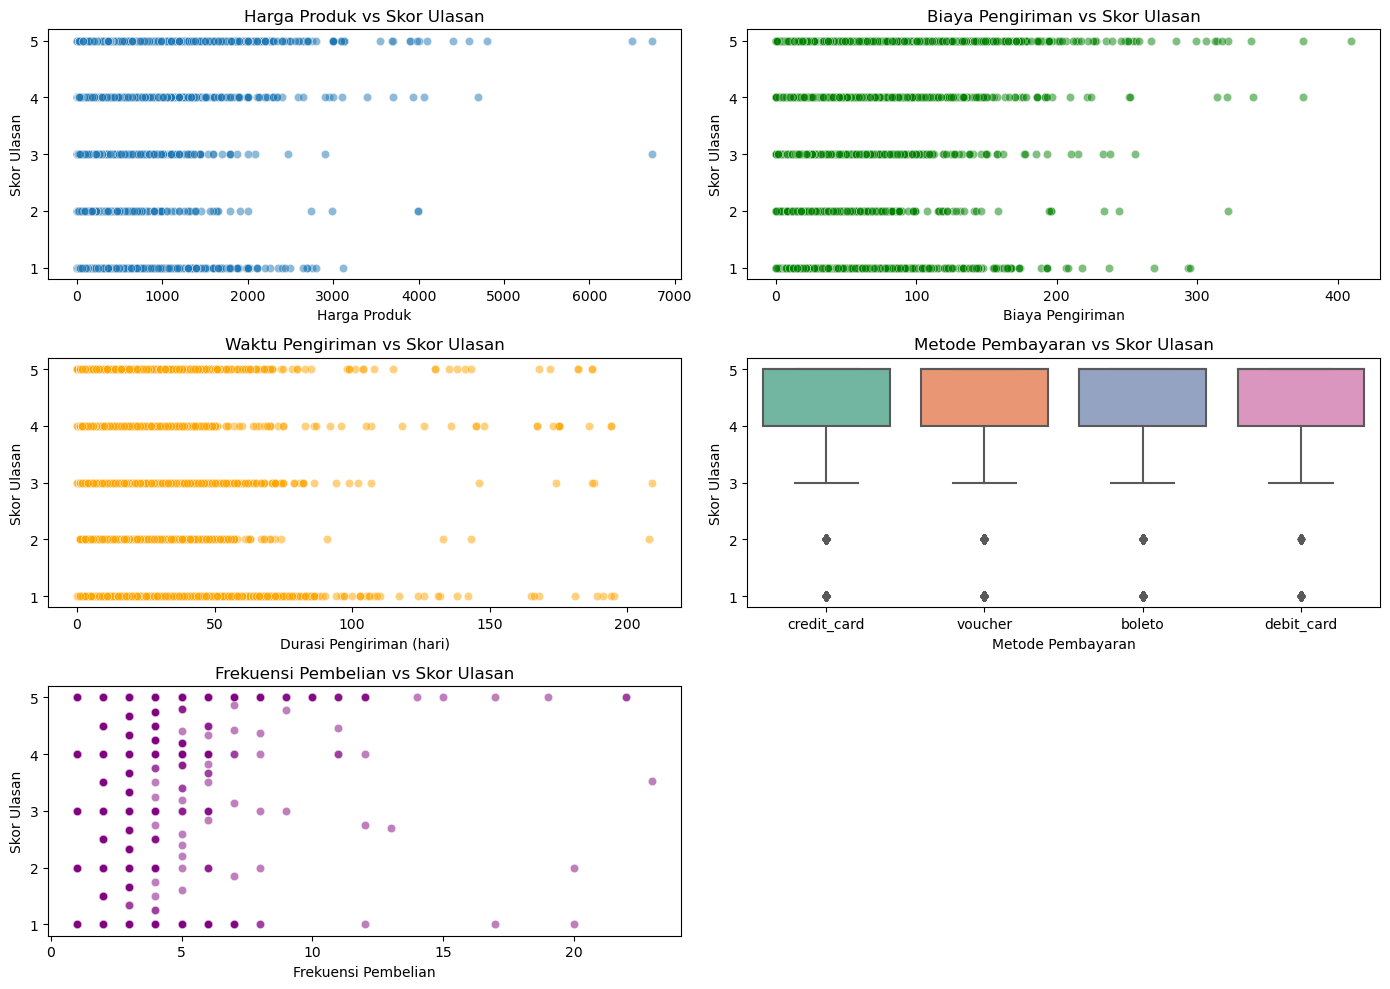

In [27]:
# 1. Hubungan antara Harga Produk dan Skor Ulasan
plt.figure(figsize=(14, 10))

# Plot hubungan antara harga produk dan skor ulasan
plt.subplot(3, 2, 1)
sns.scatterplot(x=merged_data['price'], y=merged_data['review_score'], alpha=0.5)
plt.title("Harga Produk vs Skor Ulasan")
plt.xlabel("Harga Produk")
plt.ylabel("Skor Ulasan")

# 2. Hubungan antara Biaya Pengiriman dan Skor Ulasan
plt.subplot(3, 2, 2)
sns.scatterplot(x=merged_data['freight_value'], y=merged_data['review_score'], alpha=0.5, color="green")
plt.title("Biaya Pengiriman vs Skor Ulasan")
plt.xlabel("Biaya Pengiriman")
plt.ylabel("Skor Ulasan")

# 3. Hubungan antara Waktu Pengiriman dan Skor Ulasan
# Hitung durasi pengiriman
merged_data['delivery_time'] = (merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']).dt.days

plt.subplot(3, 2, 3)
sns.scatterplot(x=merged_data['delivery_time'], y=merged_data['review_score'], alpha=0.5, color="orange")
plt.title("Waktu Pengiriman vs Skor Ulasan")
plt.xlabel("Durasi Pengiriman (hari)")
plt.ylabel("Skor Ulasan")

# 4. Hubungan antara Metode Pembayaran dan Skor Ulasan
plt.subplot(3, 2, 4)
sns.boxplot(x=merged_data['payment_type'], y=merged_data['review_score'], palette="Set2")
plt.title("Metode Pembayaran vs Skor Ulasan")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Skor Ulasan")

# 5. Frekuensi Pembelian Pelanggan dan Skor Ulasan
customer_review_freq = merged_data.groupby('customer_unique_id').agg({
    'review_score': 'mean',
    'order_id': 'count'
}).rename(columns={'order_id': 'purchase_count'})

plt.subplot(3, 2, 5)
sns.scatterplot(x=customer_review_freq['purchase_count'], y=customer_review_freq['review_score'], alpha=0.5, color="purple")
plt.title("Frekuensi Pembelian vs Skor Ulasan")
plt.xlabel("Frekuensi Pembelian")
plt.ylabel("Skor Ulasan")

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, diketahui:

1. **Harga Produk vs Skor Ulasan**: Tidak ada korelasi yang jelas antara harga produk dan skor ulasan. Baik produk dengan harga rendah maupun tinggi cenderung mendapatkan berbagai skor ulasan (1-5). Harga produk tampaknya **tidak menjadi faktor utama** yang memengaruhi skor ulasan pelanggan.

2. **Biaya Pengiriman vs Skor Ulasan**: Tidak ada korelasi yang signifikan antara biaya pengiriman dan skor ulasan. Meskipun sebagian besar pengiriman berada dalam kisaran biaya yang rendah, pelanggan tetap memberikan skor yang bervariasi (1-5).

3. **Waktu Pengiriman vs Skor Ulasan**: Ada sedikit tren bahwa waktu pengiriman yang lebih lama (lebih dari 50 hari) cenderung dikaitkan dengan skor ulasan yang lebih rendah, meskipun masih ada pelanggan yang memberikan ulasan baik untuk pengiriman yang memakan waktu lebih lama.

4. **Metode Pembayaran vs Skor Ulasan**: Tidak ada perbedaan yang signifikan dalam skor ulasan berdasarkan metode pembayaran. Pelanggan yang menggunakan **credit card**, **voucher**, **boleto**, dan **debit card** cenderung memberikan ulasan dengan pola yang mirip dengan mayoritas ulasan berada di kisaran yang lebih tinggi.

5. **Frekuensi Pembelian vs Skor Ulasan**: Pelanggan yang lebih sering melakukan pembelian (lebih dari 10 kali) cenderung memberikan skor yang lebih baik, meskipun ada beberapa outliers yang menunjukkan ulasan buruk.

### Pertanyaan 5: Kategori produk mana yang paling laris? Dan mana yang kurang laku?

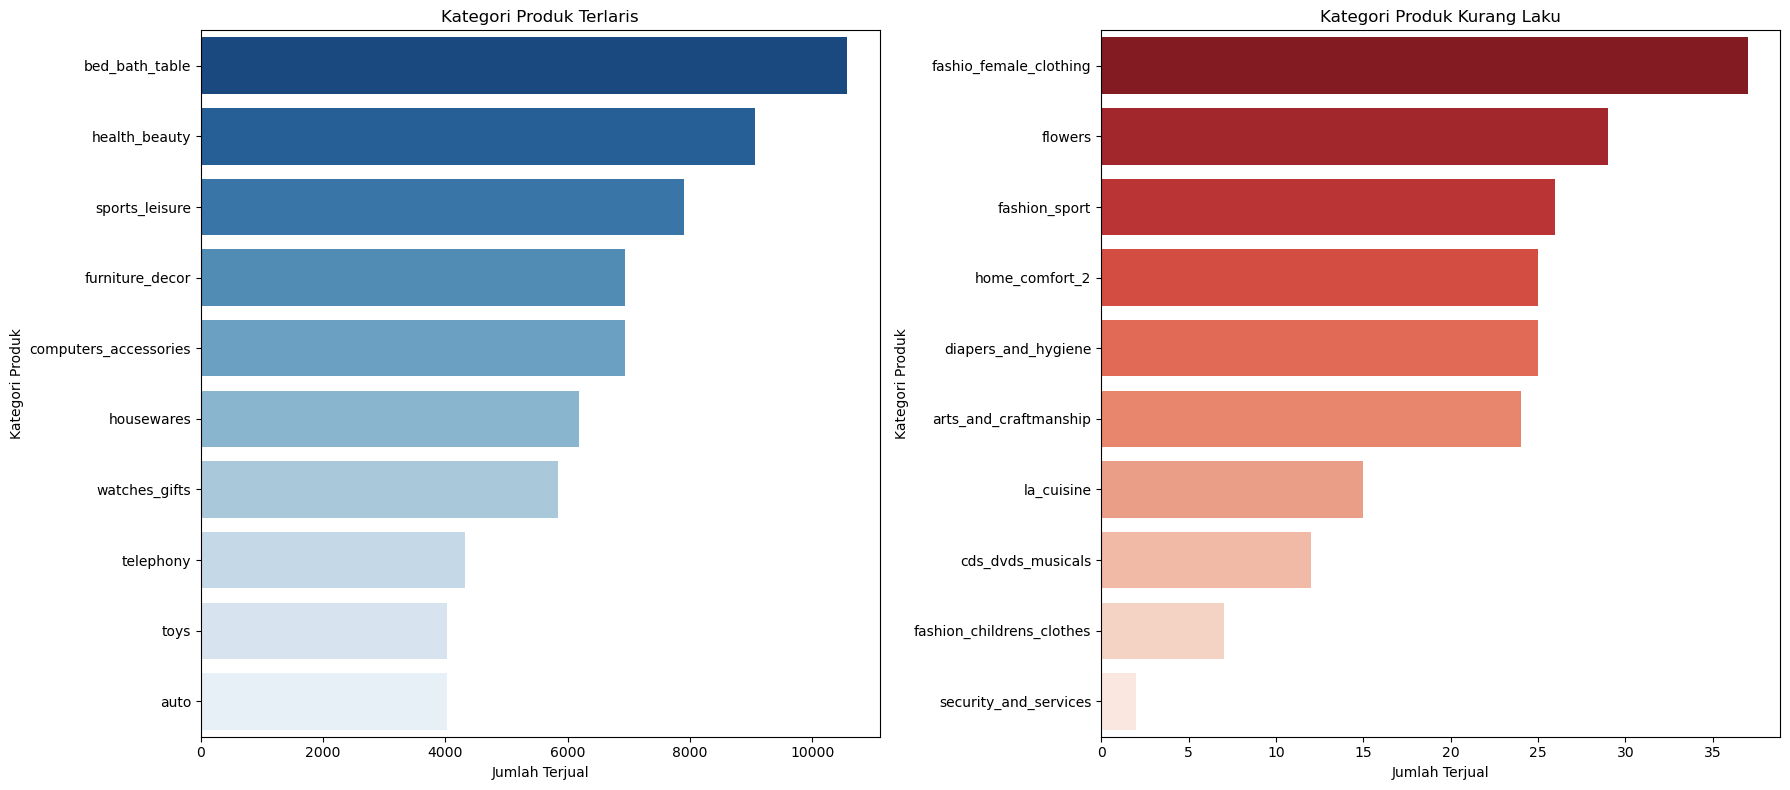

In [28]:
# Agregasi jumlah produk terjual per kategori
most_sold_categories = merged_data.groupby('product_category_name')['order_id'].count().sort_values(ascending=False)

# Ambil 10 kategori dengan penjualan terbanyak
top_10_most_sold_categories = most_sold_categories.head(10)

# Ambil 10 kategori dengan penjualan paling sedikit
bottom_10_most_sold_categories = most_sold_categories.tail(10)

# Membuat dua plot terpisah untuk kategori produk terlaris dan kurang laku
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot untuk kategori terlaris
sns.barplot(x=top_10_most_sold_categories.values, y=top_10_most_sold_categories.index, palette="Blues_r", ax=axes[0])
axes[0].set_title("Kategori Produk Terlaris")
axes[0].set_xlabel("Jumlah Terjual")
axes[0].set_ylabel("Kategori Produk")

# Plot untuk kategori kurang laku
sns.barplot(x=bottom_10_most_sold_categories.values, y=bottom_10_most_sold_categories.index, palette="Reds_r", ax=axes[1])
axes[1].set_title("Kategori Produk Kurang Laku")
axes[1].set_xlabel("Jumlah Terjual")
axes[1].set_ylabel("Kategori Produk")

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, diketahui:

**1. Kategori Terlaris:**
   - **Kategori paling laris** adalah **bed_bath_table**, diikuti oleh **health_beauty** dan **sports_leisure**.
   - **Produk dengan nilai guna tinggi** seperti **furniture_decor** dan **housewares** juga berada di antara kategori terlaris, menunjukkan bahwa barang-barang kebutuhan rumah tangga dan perabot sangat populer.
   - **Kategori terkait dengan teknologi**, seperti **computers_accessories** dan **telephony**, juga masuk dalam daftar ini, yang mengindikasikan permintaan tinggi untuk produk-produk teknologi.
   - **Toys dan auto** berada di posisi terbawah dalam kategori terlaris, namun masih menunjukkan permintaan yang signifikan dibandingkan kategori lainnya.

**2. Kategori Tidak Laris:**
   - **Fashion_female_clothing** termasuk dalam kategori dengan jumlah penjualan paling rendah, dimana ini cukup mengejutkan mengingat biasanya produk fashion cukup populer. Hal ini bisa menunjukkan adanya masalah dalam pemasaran atau kompetisi ketat di segmen ini.
   - **Flowers** juga masuk dalam kategori produk tidak laris. Hal ini bisa menandakan bahwa masalah terkait ulasan buruk memengaruhi penjualan secara keseluruhan.
   - Kategori seperti **fashion_sport**, **diapers_and_hygiene**, dan **arts_and_craftmanship** juga mengalami penjualan rendah yang mungkin menunjukkan bahwa barang-barang ini tidak terlalu populer di antara konsumen.
   - **Security_and_services** adalah kategori yang memiliki jumlah penjualan paling rendah di grafik ini, yang mungkin disebabkan oleh sifatnya yang lebih spesifik dan mungkin hanya dibutuhkan oleh segmen pasar tertentu.

### Pertanyaan 6: Bagaimana rata-rata harga per kategori produk?

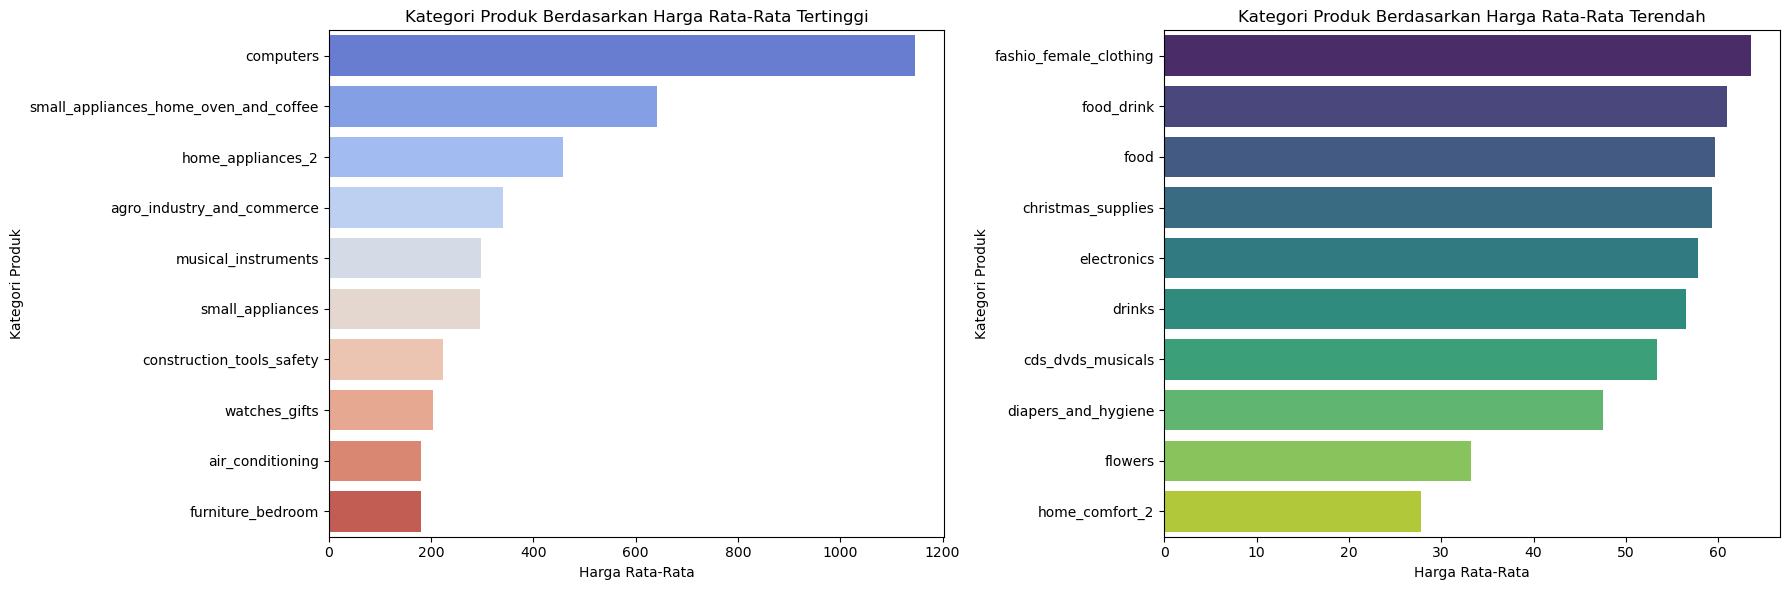

In [29]:
# 1. Rata-Rata Harga Produk Berdasarkan Kategori Produk
avg_price_per_category = merged_data.groupby('product_category_name')['price'].mean().sort_values(ascending=False)
# print("\nRata-rata Harga Produk per Kategori:")
# print(avg_price_per_category)

# Menghitung rata-rata harga produk untuk kategori dengan harga tertinggi
top_10_categories_by_price = avg_price_per_category.head(10)

# Menghitung rata-rata harga produk untuk kategori dengan harga terendah
bottom_10_categories_by_price = avg_price_per_category.tail(10)

# Membuat plot untuk perbandingan antara 10 kategori dengan harga rata-rata tertinggi dan terendah
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: kategori berdasarkan harga rata-rata produk tertinggi
sns.barplot(x=top_10_categories_by_price.values, y=top_10_categories_by_price.index, palette="coolwarm", ax=axes[0])
axes[0].set_title("Kategori Produk Berdasarkan Harga Rata-Rata Tertinggi")
axes[0].set_xlabel("Harga Rata-Rata")
axes[0].set_ylabel("Kategori Produk")

# Plot 2: kategori berdasarkan harga rata-rata produk terendah
sns.barplot(x=bottom_10_categories_by_price.values, y=bottom_10_categories_by_price.index, palette="viridis", ax=axes[1])
axes[1].set_title("Kategori Produk Berdasarkan Harga Rata-Rata Terendah")
axes[1].set_xlabel("Harga Rata-Rata")
axes[1].set_ylabel("Kategori Produk")

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, diketahui:

**1. Kategori dengan Harga Rata-Rata Tertinggi (Kiri)**
   - **Kategori produk komputer** memiliki harga rata-rata yang paling tinggi, jauh di atas kategori lainnya. Hal ini sesuai, mengingat **komputer dan perangkat keras terkait** biasanya memiliki harga yang lebih mahal.
   - Kategori seperti **small_appliances_home_oven_and_coffee** dan **home_appliances_2** juga termasuk dalam daftar harga rata-rata tertinggi. Hal ini menunjukkan bahwa barang-barang elektronik rumah tangga memiliki nilai tinggi, kemungkinan karena kualitas, kompleksitas, dan kebutuhan teknologi modern.
   - Kategori **construction_tools_safety** dan **watches_gifts** juga menunjukkan harga yang cukup tinggi. Alat konstruksi dan keselamatan sering kali dipandang sebagai investasi jangka panjang, sehingga memiliki harga tinggi.
   - **Furniture_bedroom** berada di urutan ke-10, menandakan bahwa furnitur kamar tidur juga dihargai cukup mahal, yang wajar mengingat sifatnya yang sering digunakan dalam jangka panjang dan pentingnya kualitas di sektor ini.

**2. Kategori dengan Harga Rata-Rata Terendah (Kanan)**
   - **Fashion_female_clothing** memiliki harga rata-rata terendah di antara semua kategori. Hal ini bisa disebabkan oleh tingginya persaingan di segmen fashion yang memaksa harga tetap rendah atau karena produk yang dijual adalah barang-barang dengan kualitas atau bahan yang lebih rendah.
   - **Food_drink** dan **food** berada di antara kategori dengan harga terendah. Produk makanan umumnya memiliki harga rendah karena sifatnya yang sering dikonsumsi dan dijual dalam jumlah besar.
   - **Flowers** juga termasuk dalam kategori dengan harga rendah. Ini mungkin berkaitan dengan **kualitas ulasan yang buruk**, seperti yang ditemukan sebelumnya, di mana pelanggan tidak puas dengan produk atau pengiriman bunga yang mungkin cepat layu atau rusak.
   - **Diapers_and_hygiene** juga memiliki harga rendah. Produk-produk ini sering kali dibeli dalam jumlah besar oleh pelanggan sehingga harganya ditetapkan lebih rendah untuk menarik pembeli.
   - Kategori seperti **cds_dvds_musicals** dan **home_comfort_2** juga memiliki harga rata-rata rendah, kemungkinan karena perubahan tren teknologi yang menyebabkan penurunan harga produk fisik seperti CD dan DVD.

### Pertanyaan 7: Bagaimana rata-rata biaya pengiriman per kategori produk?

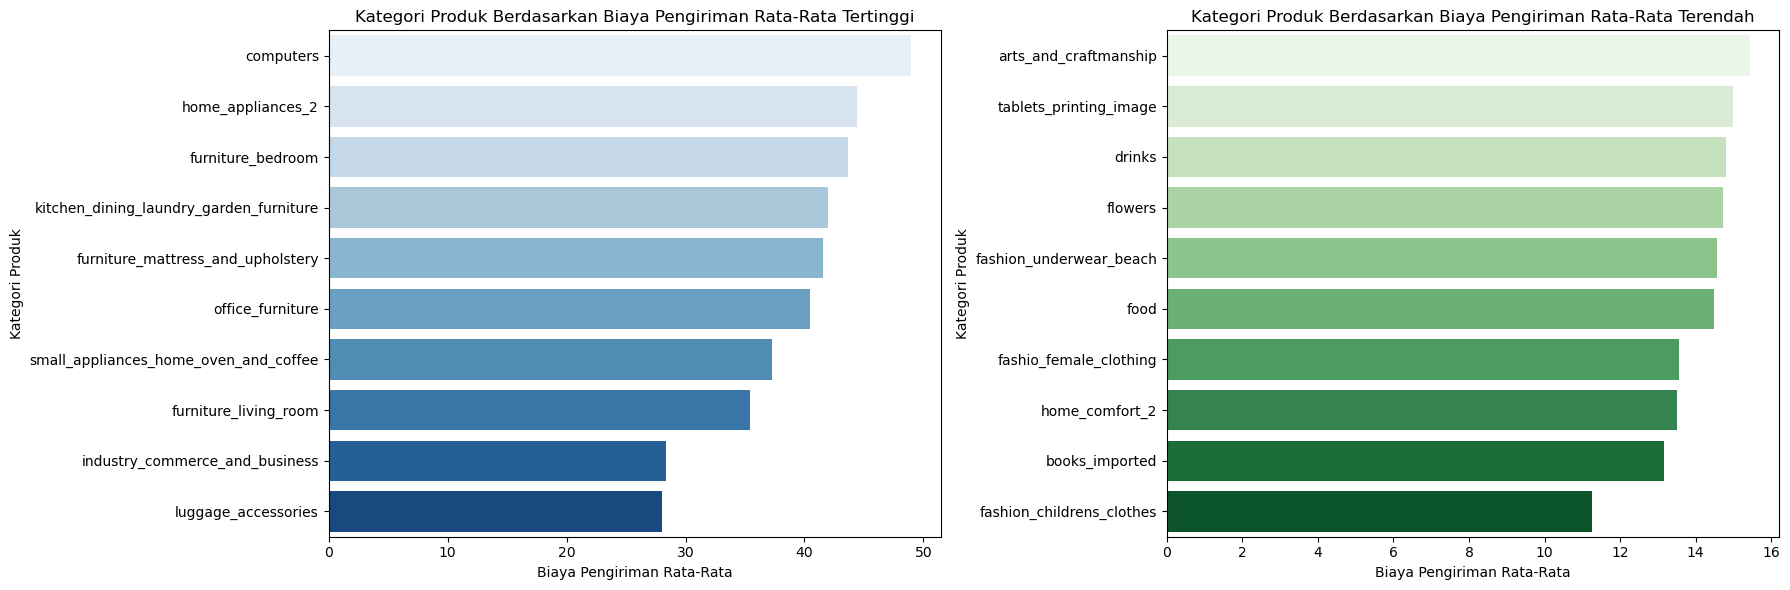

In [30]:
# Menghitung rata-rata biaya pengiriman berdasarkan kategori produk
avg_freight_per_category = merged_data.groupby('product_category_name')['freight_value'].mean().sort_values(ascending=False)

# Mengambil 10 kategori dengan biaya pengiriman rata-rata tertinggi
top_10_categories_by_freight = avg_freight_per_category.head(10)

# Mengambil 10 kategori dengan biaya pengiriman rata-rata terendah
bottom_10_categories_by_freight = avg_freight_per_category.tail(10)

# Membuat visualisasi untuk biaya pengiriman tertinggi dan terendah
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot untuk kategori dengan biaya pengiriman tertinggi
sns.barplot(x=top_10_categories_by_freight.values, y=top_10_categories_by_freight.index, palette="Blues", ax=axes[0])
axes[0].set_title("Kategori Produk Berdasarkan Biaya Pengiriman Rata-Rata Tertinggi")
axes[0].set_xlabel("Biaya Pengiriman Rata-Rata")
axes[0].set_ylabel("Kategori Produk")

# Plot untuk kategori dengan biaya pengiriman terendah
sns.barplot(x=bottom_10_categories_by_freight.values, y=bottom_10_categories_by_freight.index, palette="Greens", ax=axes[1])
axes[1].set_title("Kategori Produk Berdasarkan Biaya Pengiriman Rata-Rata Terendah")
axes[1].set_xlabel("Biaya Pengiriman Rata-Rata")
axes[1].set_ylabel("Kategori Produk")

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, diketahui:

**1. Kategori dengan Biaya Pengiriman Tertinggi (Kiri)**
   - **Kategori komputer** memiliki biaya pengiriman rata-rata yang paling tinggi. Hal ini wajar mengingat **komputer** biasanya berupa barang elektronik besar atau sensitif yang membutuhkan penanganan ekstra selama pengiriman.
   - **Home_appliances_2**, **furniture_bedroom**, dan **furniture_living_room** juga termasuk kategori dengan biaya pengiriman tinggi. Produk-produk ini biasanya berukuran besar dan berat, sehingga wajar jika membutuhkan biaya pengiriman lebih besar.
   - **Luggage_accessories** dan **industry_commerce_and_business** memiliki biaya pengiriman yang cukup tinggi, yang mungkin disebabkan oleh dimensi dan berat barang yang relatif besar.
   - Kategori **small_appliances_home_oven_and_coffee** serta **office_furniture** juga memiliki biaya pengiriman tinggi, yang lagi-lagi dikaitkan dengan ukuran dan kompleksitas produk yang dikirim.

**2. Kategori dengan Biaya Pengiriman Terendah (Kanan)**
   - **Fashion_childrens_clothes** memiliki biaya pengiriman rata-rata terendah. Hal ini wajar karena pakaian anak-anak ringan dan mudah dikemas, sehingga tidak memerlukan biaya pengiriman yang tinggi.
   - **Books_imported** dan **home_comfort_2** juga memiliki biaya pengiriman yang rendah, terutama karena produk-produk ini biasanya berukuran kecil dan ringan, yang tidak membutuhkan penanganan khusus selama pengiriman.
   - **Flowers**, meskipun memiliki masalah dalam ulasan produk, ternyata memiliki biaya pengiriman yang relatif rendah. Hal ini mungkin dikarenakan berat barang yang ringan, namun ini perlu diperhatikan dari segi kualitas pengiriman yang mungkin menurun.
   - Kategori seperti **tablets_printing_image** dan **arts_and_craftmanship** juga memiliki biaya pengiriman yang rendah. Produk-produk ini biasanya kecil dan mudah dikemas.

### Pertanyaan 8: Apakah terdapat korelasi antara waktu pengiriman dan rating ulasan yang diberikan?

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_21620\3351937785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['bad_review'] = merged_data['review_score'].apply(lambda x: 1 if x <= 2 else 0)


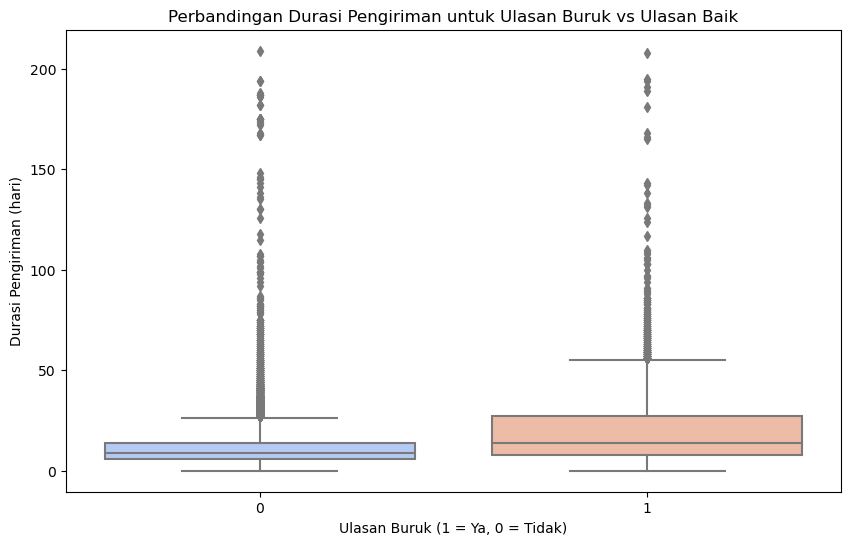

Rata-rata durasi pengiriman untuk ulasan buruk: 18.956133512862305 hari
Rata-rata durasi pengiriman untuk ulasan baik: 10.965435200729319 hari


In [31]:
# Membuat kolom review buruk (skor 1 atau 2)
merged_data['bad_review'] = merged_data['review_score'].apply(lambda x: 1 if x <= 2 else 0)

# Membandingkan durasi pengiriman berdasarkan ulasan buruk dan tidak buruk
plt.figure(figsize=(10, 6))
sns.boxplot(x='bad_review', y='delivery_time', data=merged_data, palette="coolwarm")
plt.title("Perbandingan Durasi Pengiriman untuk Ulasan Buruk vs Ulasan Baik")
plt.xlabel("Ulasan Buruk (1 = Ya, 0 = Tidak)")
plt.ylabel("Durasi Pengiriman (hari)")
plt.show()

# Menghitung rata-rata durasi pengiriman untuk ulasan buruk dan ulasan baik
avg_delivery_bad_review = merged_data[merged_data['bad_review'] == 1]['delivery_time'].mean()
avg_delivery_good_review = merged_data[merged_data['bad_review'] == 0]['delivery_time'].mean()

print(f"Rata-rata durasi pengiriman untuk ulasan buruk: {avg_delivery_bad_review} hari")
print(f"Rata-rata durasi pengiriman untuk ulasan baik: {avg_delivery_good_review} hari")


Berdasarkan grafik di atas, diketahui:

**1. Rata-Rata Durasi Pengiriman**:
- **Rata-rata durasi pengiriman untuk ulasan buruk**: **18.96 hari**.
- **Rata-rata durasi pengiriman untuk ulasan baik**: **10.97 hari**.

Hal ini menunjukkan bahwa pelanggan yang mengalami waktu pengiriman lebih lama cenderung memberikan ulasan yang buruk.

**2. Distribusi Durasi Pengiriman**:
- Dari **boxplot** di atas, kita dapat melihat bahwa distribusi untuk ulasan buruk (1) memiliki rentang yang lebih besar dan median yang lebih tinggi dibandingkan ulasan baik (0). Ulasan buruk memiliki **lebih banyak outlier** yang menunjukkan pengiriman sangat lama (beberapa melebihi 100 hari), yang mungkin menjadi penyebab utama ketidakpuasan.
- Sebaliknya, untuk ulasan baik, waktu pengiriman umumnya berada di bawah **50 hari** dengan rentang yang lebih sempit, menunjukkan bahwa pengiriman yang lebih cepat cenderung dihubungkan dengan pengalaman yang lebih positif.

### Pertanyaan 9: Kategori produk mana yang memiliki waktu pengiriman terlama?

C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_21620\870324646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_21620\870324646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['order_delivered_customer_date'] = pd.to_datetime(merged_data['order_delivered_customer_date'])
C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_21620\870324646.py:6: S

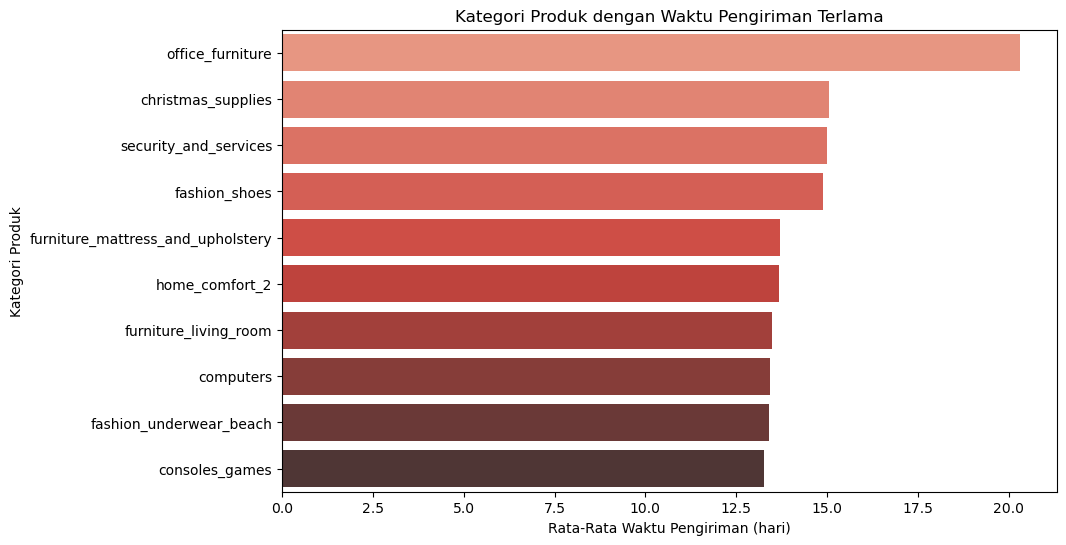

In [32]:
# Pastikan kolom tanggal dalam format datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['order_delivered_customer_date'] = pd.to_datetime(merged_data['order_delivered_customer_date'])

# Menghitung waktu pengiriman dalam hari
merged_data['delivery_time'] = (merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']).dt.days

# Menghitung rata-rata waktu pengiriman per kategori produk
avg_delivery_by_category = merged_data.groupby('product_category_name')['delivery_time'].mean().sort_values(ascending=False)

# Mengambil 10 kategori dengan rata-rata waktu pengiriman terlama
top_10_longest_delivery_categories = avg_delivery_by_category.head(10)

# Visualisasi 10 kategori dengan rata-rata waktu pengiriman terlama
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_longest_delivery_categories.values, y=top_10_longest_delivery_categories.index, palette="Reds_d")
plt.title("Kategori Produk dengan Waktu Pengiriman Terlama")
plt.xlabel("Rata-Rata Waktu Pengiriman (hari)")
plt.ylabel("Kategori Produk")
plt.show()


Berdasarkan grafik di atas, diketahui:

**1. Kategori dengan Waktu Pengiriman Terlama**:
   - **Kategori "office_furniture"** memiliki rata-rata waktu pengiriman paling lama, sekitar **20 hari**. Diikuti oleh **christmas_supplies** dan **security_and_services** yang memiliki rata-rata waktu pengiriman lebih dari **15 hari**.
   - Produk-produk dalam kategori ini kemungkinan besar memerlukan waktu lebih lama untuk diproses dan dikirim, mungkin karena ukuran yang besar atau proses penanganan yang lebih rumit.

**2. Produk Elektronik dan Furnitur**:
   - Kategori seperti **furniture_living_room**, **furniture_mattress_and_upholstery**, dan **computers** termasuk dalam kategori dengan pengiriman yang lebih lama. Hal ini bisa disebabkan oleh sifat produk yang besar dan berat, sehingga memerlukan pengiriman dengan logistik lebih kompleks.
   - **Komputer** dan produk elektronik lainnya mungkin memerlukan penanganan khusus dalam proses pengiriman, yang bisa menjelaskan waktu pengiriman yang lebih lama.

**3. Kategori Mode dan Aksesoris**:
   - **Fashion_underwear_beach** dan **fashion_shoes** termasuk dalam kategori dengan waktu pengiriman yang lebih lama. Ini bisa terjadi jika produk-produk ini diproses secara khusus (misalnya, impor atau produk yang memerlukan produksi lebih lama), atau berasal dari luar wilayah yang biasa dijangkau logistik.

**4. Kategori Musiman**:
   - **Christmas_supplies** menempati salah satu kategori dengan waktu pengiriman yang cukup lama. Ini mungkin karena produk tersebut memiliki puncak permintaan yang tinggi pada waktu-waktu tertentu, seperti mendekati musim liburan. Selain itu, keterbatasan logistik selama periode sibuk juga bisa memengaruhi waktu pengiriman.

In [33]:
merged_data.to_csv('merged_data.csv', index=False)

##RFM Analysis

**RFM Analysis** adalah metode analisis data yang digunakan untuk memahami dan mengelompokkan pelanggan berdasarkan tiga metrik utama: **Recency** (keterkinian), **Frequency** (frekuensi), dan **Monetary** (nilai moneter). Analisis ini membantu dalam mengidentifikasi pelanggan yang paling berharga, mengembangkan strategi pemasaran yang lebih efektif, dan meningkatkan loyalitas pelanggan.

#### Tiga Komponen RFM:
1. **Recency (Keterkinian)**: Mengukur waktu sejak pembelian terakhir oleh pelanggan. Pelanggan yang baru saja melakukan pembelian cenderung lebih terlibat dan berpotensi melakukan pembelian ulang. Nilai **Recency** yang rendah menunjukkan keterkinian yang tinggi.
   
2. **Frequency (Frekuensi)**: Mengukur seberapa sering pelanggan bertransaksi dalam periode tertentu. Pelanggan dengan frekuensi tinggi biasanya lebih loyal dan lebih mungkin untuk membeli lagi.

3. **Monetary (Nilai Moneter)**: Mengukur total nilai pembelian yang dihasilkan oleh pelanggan dalam periode tertentu. Pelanggan dengan nilai moneter tinggi dianggap lebih berharga bagi bisnis.

#### Bagaimana RFM Analysis Bekerja:
Dalam analisis RFM, pelanggan dibagi ke dalam kelompok atau skor berdasarkan masing-masing metrik (R, F, dan M). Biasanya, skor diberikan dalam skala (misalnya, 1–5), di mana skor lebih tinggi menunjukkan keterlibatan atau nilai yang lebih besar. Kombinasi skor RFM menghasilkan profil pelanggan yang lebih rinci.

Contohnya, pelanggan dengan **skor RFM tinggi** (misalnya, 5-5-5) dapat dianggap sebagai pelanggan terbaik, karena mereka:
- Baru saja melakukan pembelian (**R**),
- Melakukan transaksi berulang kali (**F**),
- Menghasilkan pendapatan tinggi (**M**).

Sebaliknya, pelanggan dengan **skor RFM rendah** (misalnya, 1-1-1) mungkin membutuhkan pendekatan pemasaran yang berbeda atau mungkin tidak menjadi target prioritas.

#### Manfaat RFM Analysis:
Manfaat RFM Analysis bagi dataset Anda dapat dijabarkan sebagai berikut:

1. Mengidentifikasi pelanggan yang sering melakukan pembelian, menghasilkan pendapatan tinggi, dan berpotensi menjadi target prioritas.

2. Menyesuaikan kampanye pemasaran, seperti menawarkan diskon khusus kepada pelanggan yang baru pertama kali membeli atau memperkuat hubungan dengan pelanggan setia.

3. Menyediakan wawasan tentang perilaku pembelian sehingga bisa merancang program loyalitas yang lebih efektif untuk mempertahankan pelanggan setia.

4. Dengan memahami keterkinian pembelian (Recency), dapat mengidentifikasi pelanggan yang cenderung tidak aktif dan menawarkan insentif untuk menarik mereka kembali.

5. Membantu dalam menganalisis produk yang paling sering dibeli oleh segmen tertentu, sehingga dapat mengoptimalkan stok dan fokus pada produk yang diminati.

### Pertanyaan 10: Bagaimana mengelompokkan pelanggan dengan menggunakan RFM Analysis?

In [34]:
# Mendefinisikan tanggal terakhir berdasarkan data 'order_purchase_timestamp'
last_date = merged_data['order_purchase_timestamp'].max() + pd.to_timedelta(1, 'D')

# Menghitung RFM metrics
RFM = merged_data.dropna(subset=['order_purchase_timestamp'])\
            .reset_index()\
            .groupby('customer_unique_id')\
            .agg(Recency = ('order_purchase_timestamp', lambda x: (last_date - x.max()).days),  # Recency
                 Frequency = ('order_id', 'count'),  # Frequency (jumlah pesanan)
                 Monetary = ('price', 'sum'))  # Monetary (total pengeluaran)

# Melihat hasil RFM
print(RFM.head())


                                  Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      112          1    129.90
0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     18.90
0000f46a3911fa3c0805444483337064      537          1     69.00
0000f6ccb0745a6a4b88665a16c9f078      321          1     25.99
0004aac84e0df4da2b147fca70cf8255      288          1    180.00


In [35]:
# Mengelompokkan pelanggan berdasarkan Recency (R), Monetary (M), dan Frequency (F)

# Mengelompokkan nilai Recency menjadi 3 kategori
RFM['R_score'] = pd.qcut(RFM['Recency'], 3, labels=[1, 2, 3]).astype(str)
# Mengelompokkan nilai Monetary menjadi 3 kategori
RFM['M_score'] = pd.qcut(RFM['Monetary'], 3, labels=[1, 2, 3]).astype(str)
# Mengelompokkan nilai Frequency menjadi 2 kategori
RFM['F_score'] = RFM['Frequency'].apply(lambda x: '1' if x==1 else '2')

# Membuat kolom RFM_score berdasarkan kombinasi R, F, dan M
RFM['RFM_score'] = RFM['R_score'] + RFM['F_score'] + RFM['M_score']

Pengelompokan segmen **Gold**, **Silver**, dan **Bronze** dilakukan berdasarkan skor RFM (Recency, Frequency, Monetary).
   - Pengelompokan recency dibagi menjadi 3 skor. Skor 3 berarti pelanggan baru-baru ini melakukan pembelian, sedangkan skor 1 berarti sudah lama sejak pembelian terakhir.
   - Pengelompokan Monetary dibagi menjadi 3 kategori: skor 3 untuk pelanggan dengan nilai belanja tinggi, dan skor 1 untuk pelanggan dengan nilai belanja rendah.
   - Pengelompokan Frequency dibagi hanya menjadi 2 kategori. Pelanggan yang hanya melakukan 1 pembelian mendapatkan skor 1, dan pelanggan yang melakukan lebih dari 1 pembelian mendapatkan skor 2.

Setelah menghitung skor Recency, Frequency, dan Monetary, skor-skor tersebut digabungkan menjadi kolom baru yang disebut **RFM_score**. Nilai RFM_score adalah kombinasi dari tiga skor dalam format string, misalnya `RFM_score = '322'`, yang berarti pelanggan memiliki:
   - Recency 3 (baru-baru ini membeli),
   - Frequency 2 (melakukan lebih dari satu pembelian), dan
   - Monetary 2 (pengeluaran sedang).

Pengelompokkan:
1. **Gold**: Pelanggan dengan skor RFM yang tinggi, yaitu kombinasi yang mencakup skor Recency, Frequency, dan Monetary yang tinggi. Misalnya, pelanggan dengan skor `333`, `332`, `323`, atau `322` dianggap sebagai pelanggan **Gold**. Segmen ini adalah pelanggan terbaik yang baru-baru ini melakukan pembelian, sering melakukan pembelian, dan memiliki pengeluaran yang tinggi.
   
2. **Silver**: Pelanggan dengan skor yang sedang, yaitu skor yang termasuk dalam kombinasi `221`, `222`, `223`, `232`, `231`, `233`. Pelanggan ini melakukan pembelian dengan frekuensi sedang, dengan pengeluaran yang juga sedang, namun mungkin tidak melakukan pembelian sebaru pelanggan **Gold**.
   
3. **Bronze**: Semua pelanggan yang tidak masuk kategori **Gold** atau **Silver** akan masuk ke dalam segmen **Bronze**. Segmen ini biasanya mencakup pelanggan dengan frekuensi dan pengeluaran yang rendah atau mereka yang sudah lama tidak melakukan pembelian.


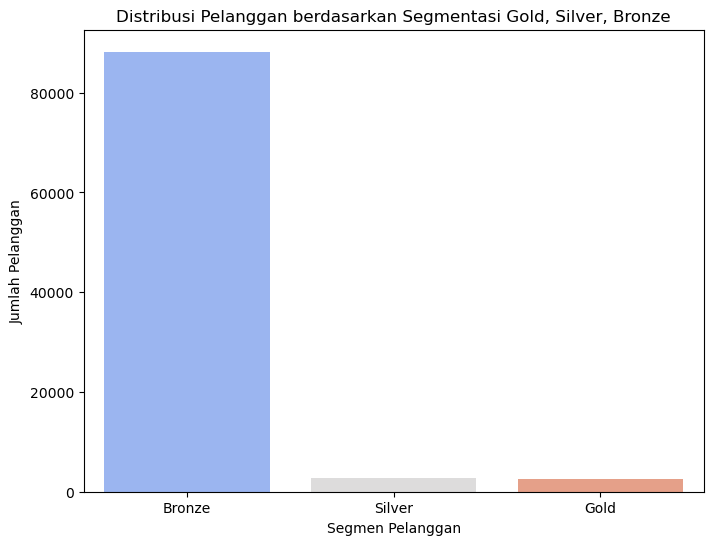

In [36]:
# Membuat pengelompokan berdasarkan nilai RFM_score
def categorize_rfm_score(rfm_score):
    if rfm_score in ['333', '332', '323', '322']:
        return 'Gold'
    elif rfm_score in ['221', '222', '223', '232', '231', '233']:
        return 'Silver'
    else:
        return 'Bronze'

# Menerapkan fungsi pengelompokan ke kolom RFM_score
RFM['segment'] = RFM['RFM_score'].apply(categorize_rfm_score)

# Melihat hasil pengelompokan
#print(RFM.head())

# Visualisasi Distribusi Segmen Gold, Silver, Bronze
plt.figure(figsize=(8, 6))
segment_counts = RFM['segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='coolwarm')
plt.title('Distribusi Pelanggan berdasarkan Segmentasi Gold, Silver, Bronze')
plt.ylabel('Jumlah Pelanggan')
plt.xlabel('Segmen Pelanggan')
plt.show()

Berdasarkan grafik di atas, diketahui:

1. Sebagian besar pelanggan termasuk dalam **segmen Bronze**, menunjukkan bahwa mayoritas pelanggan memiliki nilai RFM yang lebih rendah dibandingkan dengan segmen lainnya.

2. **Segmen Silver** dan **Gold** sangat kecil dibandingkan dengan Bronze. Hal ini menunjukkan bahwa hanya sedikit pelanggan yang memiliki nilai RFM yang lebih tinggi (lebih loyal atau lebih sering berbelanja). Hal ini bisa menjadi sinyal bahwa terdapat peluang besar untuk meningkatkan loyalitas dan nilai pelanggan di segmen Bronze agar mereka naik ke segmen Silver atau Gold.

3. **Segmen Bronze** bisa menjadi target untuk strategi pemasaran yang bertujuan meningkatkan frekuensi pembelian dan nilai pembelian, sehingga mereka dapat berpindah ke segmen Silver atau Gold. **Segmen Gold** dan **Silver** dapat lebih diperhatikan dengan program loyalitas atau penawaran eksklusif untuk mempertahankan pelanggan setia ini.

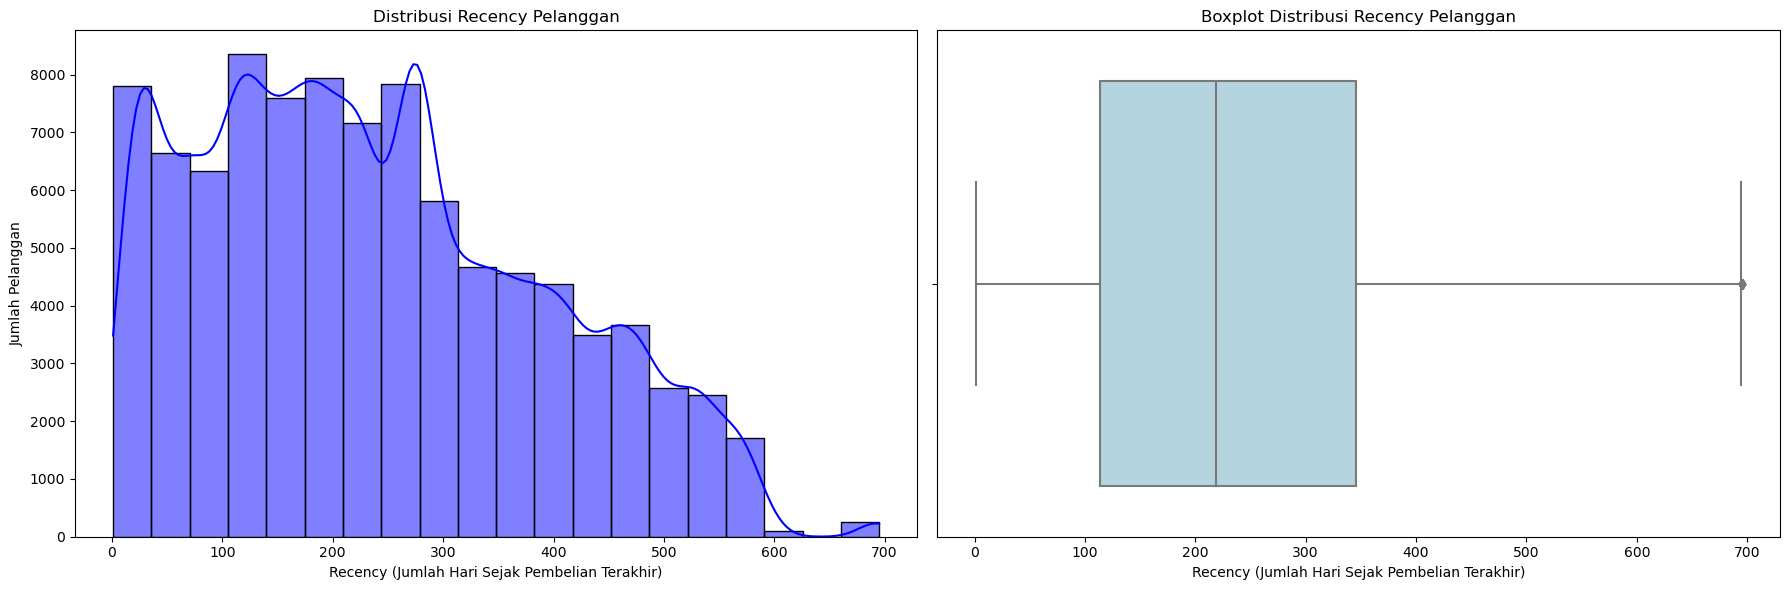

In [37]:
# Membuat 2 plot dalam satu baris (histogram dan boxplot)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram untuk distribusi Recency
sns.histplot(RFM['Recency'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribusi Recency Pelanggan')
axes[0].set_xlabel('Recency (Jumlah Hari Sejak Pembelian Terakhir)')
axes[0].set_ylabel('Jumlah Pelanggan')

# Boxplot untuk distribusi Recency
sns.boxplot(x=RFM['Recency'], color='lightblue', ax=axes[1])
axes[1].set_title('Boxplot Distribusi Recency Pelanggan')
axes[1].set_xlabel('Recency (Jumlah Hari Sejak Pembelian Terakhir)')

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, diketahui:

1. **Distribusi Recency**:
   - Grafik distribusi pada sisi kiri menunjukkan bahwa mayoritas pelanggan melakukan pembelian terakhirnya sekitar 50 hingga 300 hari yang lalu. Semakin jauh ke kanan, jumlah pelanggan yang melakukan pembelian semakin sedikit, dengan penurunan tajam setelah 300 hari.
   - Pola ini menunjukkan bahwa sebagian besar pelanggan melakukan pembelian dalam waktu yang relatif dekat, namun ada juga pelanggan yang sudah lama tidak melakukan pembelian.

2. **Boxplot Recency**:
   - Boxplot di sebelah kanan menunjukkan persebaran nilai recency. Nilai **median** recency (garis tengah pada kotak) berada di sekitar 200 hari, yang berarti 50% pelanggan telah melakukan pembelian dalam waktu kurang dari 200 hari.
   - **Outliers** juga terlihat pada bagian kanan, menunjukkan bahwa ada sejumlah kecil pelanggan yang tidak melakukan pembelian selama lebih dari 700 hari.

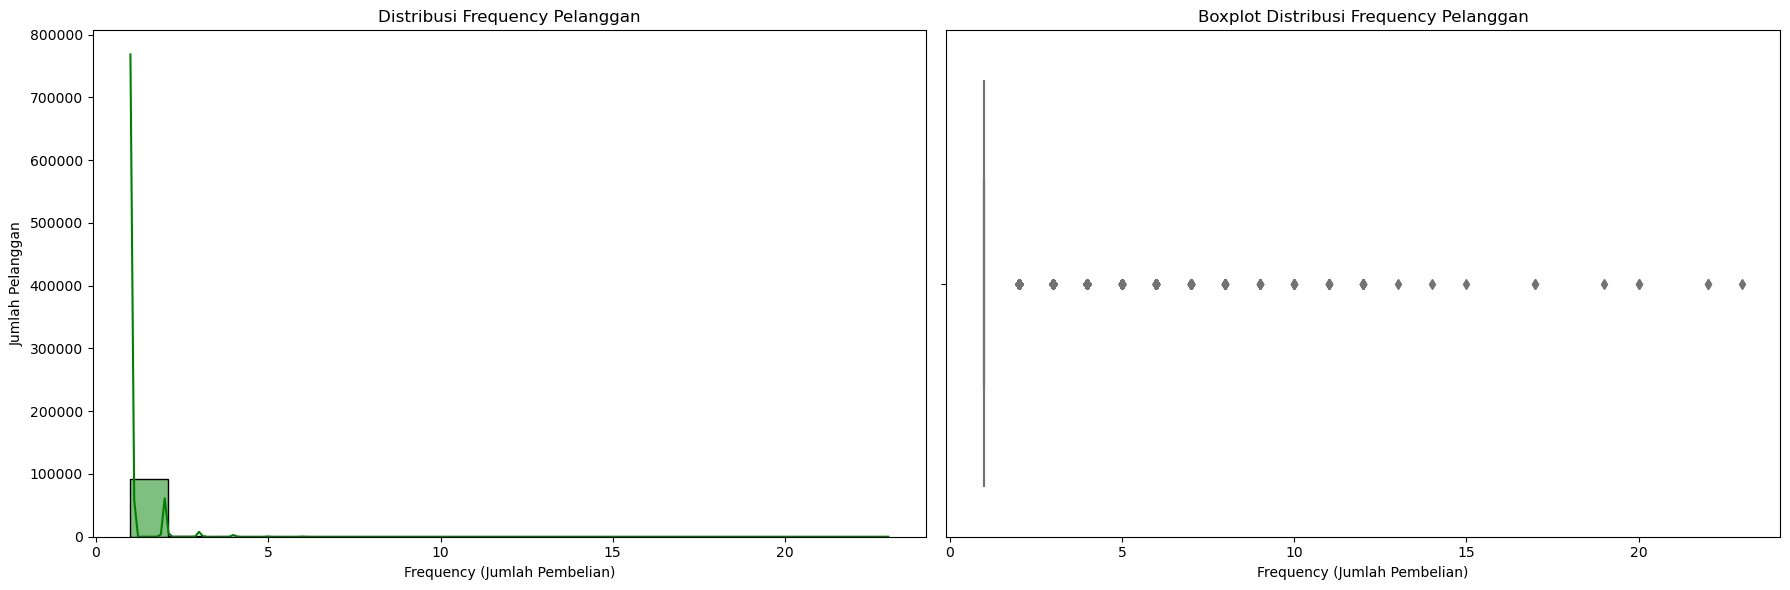

In [38]:
# Membuat 2 plot dalam satu baris (histogram dan boxplot)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram untuk distribusi Frequency
sns.histplot(RFM['Frequency'], bins=20, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribusi Frequency Pelanggan')
axes[0].set_xlabel('Frequency (Jumlah Pembelian)')
axes[0].set_ylabel('Jumlah Pelanggan')

# Boxplot untuk distribusi Frequency
sns.boxplot(x=RFM['Frequency'], color='lightgreen', ax=axes[1])
axes[1].set_title('Boxplot Distribusi Frequency Pelanggan')
axes[1].set_xlabel('Frequency (Jumlah Pembelian)')

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, diketahui:

1. Mayoritas pelanggan dalam dataset memiliki **frekuensi pembelian hanya satu kali**. Hal ini terlihat dari puncak grafik distribusi yang terletak di nilai **1**. Jumlah pelanggan dengan frekuensi lebih dari 1 kali menurun drastis, dan sangat sedikit pelanggan yang melakukan lebih dari **5 pembelian**.

2. Pada **boxplot**, pelanggan yang memiliki frekuensi pembelian lebih dari **5 kali** dianggap sebagai **outliers**. Ini mengindikasikan bahwa meskipun ada pelanggan yang sangat sering berbelanja, mereka adalah minoritas. Sebagian besar pelanggan melakukan pembelian sekali atau dua kali, dan ada pelanggan yang melakukan pembelian hingga lebih dari **20 kali**, meskipun mereka sangat sedikit.

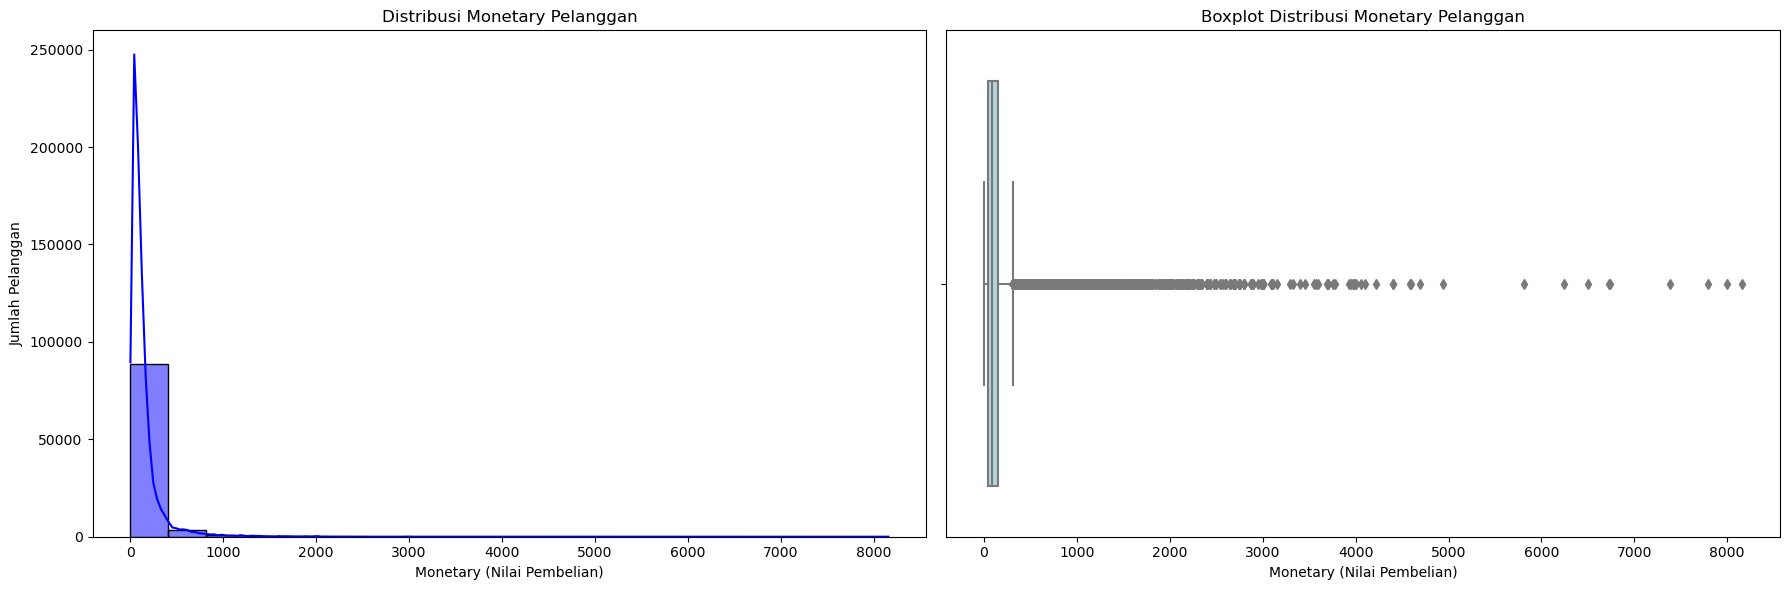

In [39]:
# Membuat 2 plot dalam satu baris (histogram dan boxplot)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram untuk distribusi Monetary
sns.histplot(RFM['Monetary'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribusi Monetary Pelanggan')
axes[0].set_xlabel('Monetary (Nilai Pembelian)')
axes[0].set_ylabel('Jumlah Pelanggan')

# Boxplot untuk distribusi Monetary
sns.boxplot(x=RFM['Monetary'], color='lightblue', ax=axes[1])
axes[1].set_title('Boxplot Distribusi Monetary Pelanggan')
axes[1].set_xlabel('Monetary (Nilai Pembelian)')

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, diketahui:
1. **Distribusi Histogram**:
   - Mayoritas pelanggan memiliki nilai pembelian yang sangat rendah, dengan puncak distribusi terjadi pada nilai **di bawah 500**.
   - Distribusi nilai pembelian menunjukkan kecenderungan menurun dengan sangat cepat seiring meningkatnya nilai pembelian, yang berarti sebagian besar pelanggan hanya melakukan pembelian dengan nilai yang rendah.
   - Jumlah pelanggan yang melakukan pembelian dengan nilai lebih tinggi (di atas 1000) sangat kecil, dan semakin menurun seiring bertambahnya nilai.

2. **Boxplot**:
   - Boxplot menunjukkan bahwa terdapat **banyak outliers** yang memiliki nilai pembelian yang sangat tinggi, hingga lebih dari **8000**.
   - Namun, interkuartil (IQR) atau mayoritas data berada di kisaran nilai yang sangat rendah, yang menunjukkan bahwa hanya sebagian kecil pelanggan yang melakukan pembelian dengan nilai sangat tinggi.
   - Adanya outliers yang signifikan menandakan bahwa ada beberapa pelanggan yang berkontribusi secara besar terhadap pendapatan, tetapi mereka adalah minoritas.

### Pertanyaan 11: Bagaimana tren volume penjualan dari waktu ke waktu (bulanan/tahunan) antar segmen pelanggan?

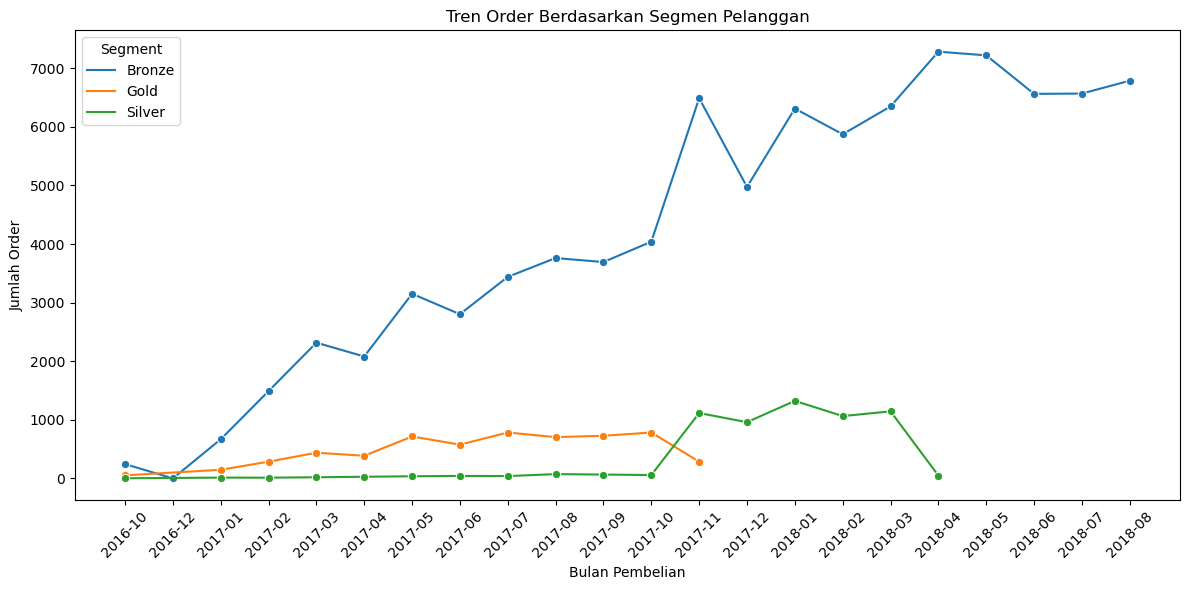

In [40]:
# Pastikan kolom 'customer_unique_id' terdapat di kedua dataframe untuk melakukan join
RFM_with_timestamp = pd.merge(RFM, merged_data[['customer_unique_id', 'order_purchase_timestamp']], on='customer_unique_id', how='left')

# Mengonversi kolom 'order_purchase_timestamp' menjadi format datetime jika belum
RFM_with_timestamp['order_purchase_timestamp'] = pd.to_datetime(RFM_with_timestamp['order_purchase_timestamp'])

# Menambahkan kolom bulan untuk analisis tren per bulan
RFM_with_timestamp['bulan_pembelian'] = RFM_with_timestamp['order_purchase_timestamp'].dt.to_period('M')

# Menghitung jumlah order per bulan per segmen
segmen_trend = RFM_with_timestamp.groupby(['bulan_pembelian', 'segment']).size().reset_index(name='jumlah_order')

# Convert 'bulan_pembelian' to string representation for plotting
segmen_trend['bulan_pembelian'] = segmen_trend['bulan_pembelian'].astype(str)

# Visualisasi tren order dari masing-masing segmen
plt.figure(figsize=(12, 6))

# Membuat lineplot untuk menampilkan tren dari masing-masing segmen
sns.lineplot(data=segmen_trend, x='bulan_pembelian', y='jumlah_order', hue='segment', marker='o')

plt.title('Tren Order Berdasarkan Segmen Pelanggan')
plt.xlabel('Bulan Pembelian')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()

# Menampilkan grafik
plt.show()

Berdasarkan grafik di atas, diketahui:

1. **Segmen Bronze**:
   - Segmen "Bronze" memiliki jumlah order yang jauh lebih besar dibandingkan dengan segmen lain (Gold dan Silver). Tren ini terlihat konsisten meningkat sejak 2017 hingga akhir 2017, dengan puncaknya di sekitar Oktober-November 2017, di mana jumlah order mencapai lebih dari 7000 order.
   - Segmen ini menunjukkan pertumbuhan pesat dari awal 2017 hingga November 2017. Setelah puncak, terjadi sedikit penurunan pada Desember 2017, namun secara keseluruhan, segmen ini tetap yang paling dominan dalam hal jumlah order.
   - Setelah pertumbuhan awal yang cepat, terlihat bahwa tren pesanan mulai stabil, tetapi tetap pada level yang lebih tinggi daripada segmen lain.

2. **Segmen Gold**:
   - Segmen "Gold" memiliki jumlah order yang relatif lebih kecil dibandingkan dengan "Bronze", dan trennya cukup stabil dengan fluktuasi kecil. Jumlah pesanan berada di kisaran yang sama selama sebagian besar periode, dengan sedikit penurunan pada akhir 2017 dan awal 2018.
   - Segmen ini memiliki potensi untuk peningkatan dengan strategi pemasaran yang tepat karena jumlah ordernya tidak menunjukkan pertumbuhan yang signifikan, namun ada stabilitas yang menunjukkan adanya pelanggan setia.

3. **Segmen Silver**:
   - Segmen "Silver" menunjukkan tren peningkatan yang lambat tapi stabil pada akhir 2017 hingga awal 2018, meskipun jumlah order secara keseluruhan jauh lebih rendah dibandingkan dengan segmen "Bronze".
   - Ada penurunan jumlah order yang signifikan pada April 2018, yang dapat menunjukkan adanya masalah pada pelanggan di segmen ini, atau mungkin kurangnya strategi promosi yang sesuai.

### Pertanyaan 12: Kategori produk mana yang paling laku berdasarkan segmen pelanggan?

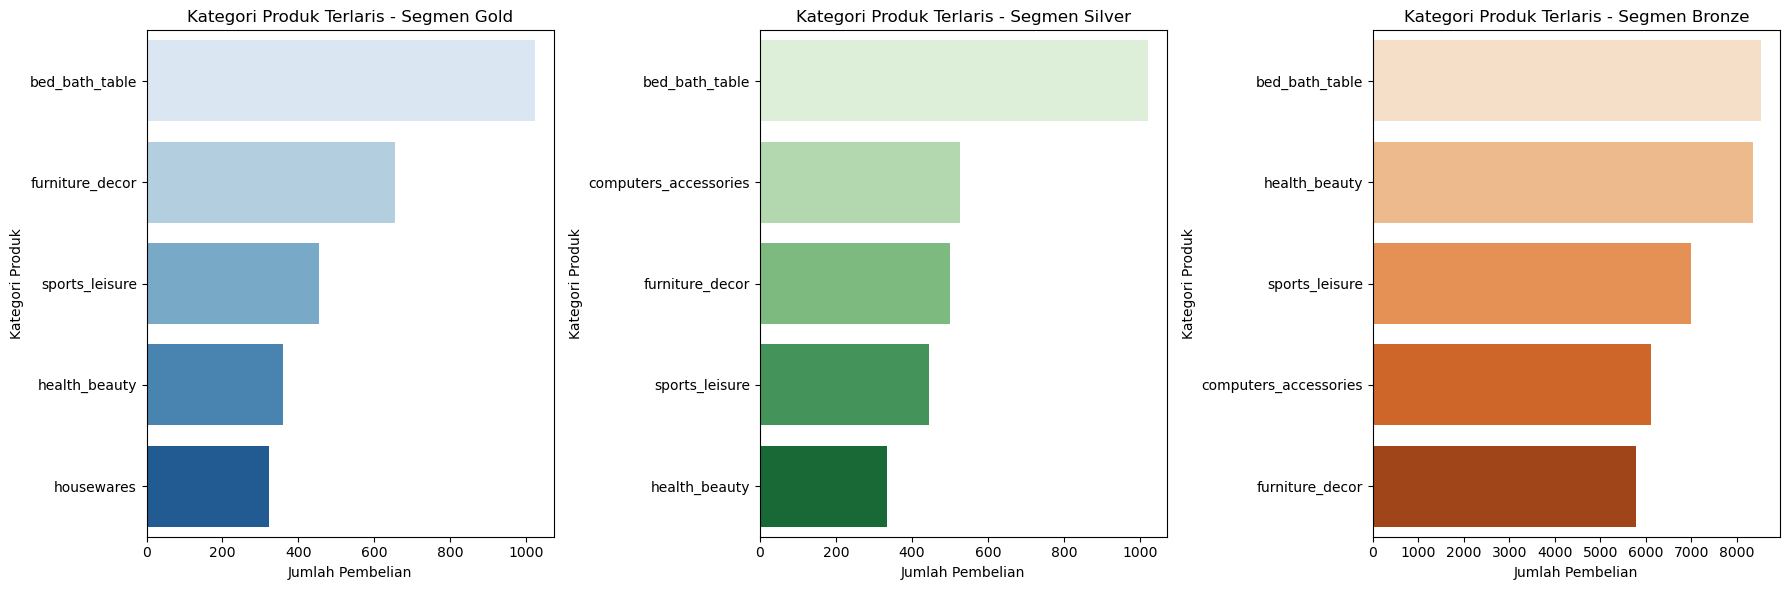

In [41]:
# Menggabungkan data RFM dengan kategori produk
RFM_category = pd.merge(RFM, merged_data[['customer_unique_id', 'product_category_name']],
                        left_on='customer_unique_id', right_on='customer_unique_id', how='left')

# Menghitung 5 kategori produk paling banyak dibeli untuk setiap segmen
top_categories_by_segment = RFM_category.groupby(['segment', 'product_category_name']) \
    .size().reset_index(name='count')

# Mengambil 5 kategori teratas untuk setiap segmen
top_5_categories_by_segment = top_categories_by_segment.groupby('segment') \
    .apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Membuat plot dengan 1 baris 3 kolom untuk segmen Gold, Silver, dan Bronze
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot untuk segmen Gold
sns.barplot(x='count', y='product_category_name', data=top_5_categories_by_segment[top_5_categories_by_segment['segment'] == 'Gold'],
            ax=axes[0], palette='Blues')
axes[0].set_title('Kategori Produk Terlaris - Segmen Gold')
axes[0].set_xlabel('Jumlah Pembelian')
axes[0].set_ylabel('Kategori Produk')

# Plot untuk segmen Silver
sns.barplot(x='count', y='product_category_name', data=top_5_categories_by_segment[top_5_categories_by_segment['segment'] == 'Silver'],
            ax=axes[1], palette='Greens')
axes[1].set_title('Kategori Produk Terlaris - Segmen Silver')
axes[1].set_xlabel('Jumlah Pembelian')
axes[1].set_ylabel('Kategori Produk')

# Plot untuk segmen Bronze
sns.barplot(x='count', y='product_category_name', data=top_5_categories_by_segment[top_5_categories_by_segment['segment'] == 'Bronze'],
            ax=axes[2], palette='Oranges')
axes[2].set_title('Kategori Produk Terlaris - Segmen Bronze')
axes[2].set_xlabel('Jumlah Pembelian')
axes[2].set_ylabel('Kategori Produk')

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, diketahui:

1. **Segmen Gold**:
   - Kategori **bed_bath_table** merupakan produk yang paling sering dibeli oleh pelanggan di segmen Gold. Hal ini menunjukkan bahwa pelanggan dengan kategori Gold memiliki preferensi yang kuat terhadap produk yang terkait dengan tempat tidur, kamar mandi, dan meja.
   - Produk **furniture_decor** dan **sports_leisure** juga cukup populer, mencerminkan minat pelanggan Gold terhadap furnitur dan aktivitas olahraga.
   - **health_beauty** serta **housewares** melengkapi lima besar kategori ini, yang berarti pelanggan Gold memiliki preferensi yang beragam.

2. **Segmen Silver**:
   - Pada segmen Silver, **bed_bath_table** juga tetap menjadi kategori produk yang paling sering dibeli, menunjukkan pola yang mirip dengan segmen Gold.
   - Di sini, ada kehadiran kategori **computers_accessories**, yang menunjukkan minat pelanggan Silver terhadap produk teknologi.
   - **furniture_decor** dan **sports_leisure** tetap menjadi kategori populer di kalangan pelanggan Silver, mencerminkan pola konsumsi yang hampir serupa dengan segmen Gold, meski dalam jumlah yang lebih sedikit.

3. **Segmen Bronze**:
   - **bed_bath_table** kembali menjadi kategori yang paling populer, namun dengan jumlah pembelian yang lebih tinggi dibandingkan Silver dan Gold, menunjukkan bahwa meskipun ini segmen dengan nilai rendah (bronze), mereka masih cenderung membeli produk di kategori ini secara signifikan.
   - Kategori **health_beauty** dan **sports_leisure** juga populer di segmen Bronze, namun dengan volume pembelian yang lebih tinggi dari segmen lainnya.
   - Di segmen Bronze, kategori **computers_accessories** dan **furniture_decor** berada di posisi teratas dalam hal jumlah pembelian, dengan tingkat pembelian yang lebih tinggi dibandingkan segmen Silver.

### Pertanyaan 13: Kategori produk mana yang kurang laku berdasarkan segmen pelanggan?

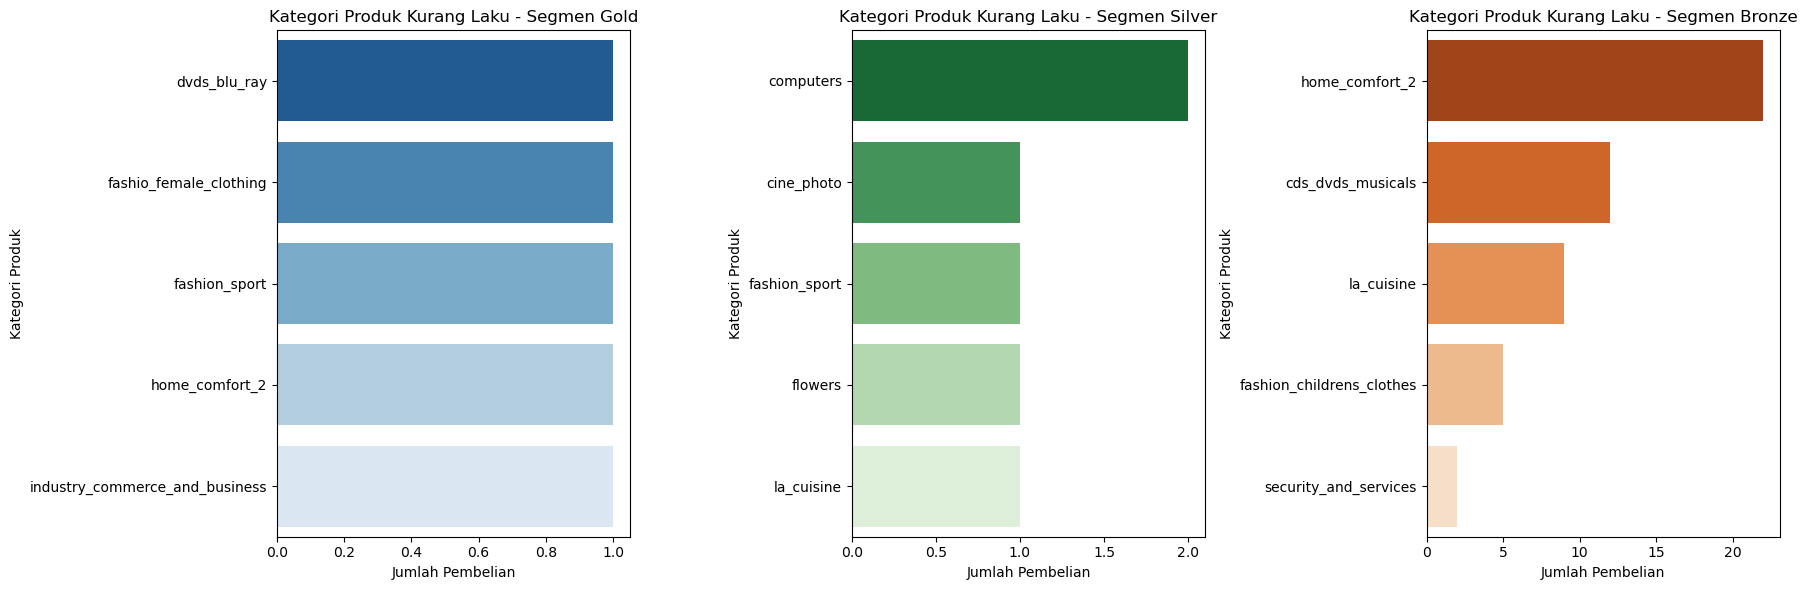

In [42]:
# Menghitung kategori produk Kurang Laku untuk setiap segmen
bottom_categories_by_segment = RFM_category.groupby(['segment', 'product_category_name']) \
    .size().reset_index(name='count')

# Mengambil 5 kategori terbawah (Kurang Laku) untuk setiap segmen, lalu urutkan dari yang terbesar ke terkecil
bottom_5_categories_by_segment = bottom_categories_by_segment.groupby('segment') \
    .apply(lambda x: x.nsmallest(5, 'count').sort_values(by='count', ascending=False)).reset_index(drop=True)

# Membuat plot dengan 1 baris 3 kolom untuk segmen Gold, Silver, dan Bronze
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot untuk segmen Gold (Kurang Laku)
sns.barplot(x='count', y='product_category_name', data=bottom_5_categories_by_segment[bottom_5_categories_by_segment['segment'] == 'Gold'],
            ax=axes[0], palette='Blues_r')
axes[0].set_title('Kategori Produk Kurang Laku - Segmen Gold')
axes[0].set_xlabel('Jumlah Pembelian')
axes[0].set_ylabel('Kategori Produk')

# Plot untuk segmen Silver (Kurang Laku)
sns.barplot(x='count', y='product_category_name', data=bottom_5_categories_by_segment[bottom_5_categories_by_segment['segment'] == 'Silver'],
            ax=axes[1], palette='Greens_r')
axes[1].set_title('Kategori Produk Kurang Laku - Segmen Silver')
axes[1].set_xlabel('Jumlah Pembelian')
axes[1].set_ylabel('Kategori Produk')

# Plot untuk segmen Bronze (Kurang Laku)
sns.barplot(x='count', y='product_category_name', data=bottom_5_categories_by_segment[bottom_5_categories_by_segment['segment'] == 'Bronze'],
            ax=axes[2], palette='Oranges_r')
axes[2].set_title('Kategori Produk Kurang Laku - Segmen Bronze')
axes[2].set_xlabel('Jumlah Pembelian')
axes[2].set_ylabel('Kategori Produk')

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, diketahui:

**Segmen Gold:**
- Produk **dvds_blu_ray** menjadi kategori yang paling sedikit dibeli oleh pelanggan di segmen Gold. Ini menunjukkan bahwa meskipun pelanggan Gold memiliki daya beli tinggi, minat terhadap kategori ini sangat rendah.
- Kategori **fashio_female_clothing** dan **fashion_sport** juga memiliki jumlah pembelian yang sangat sedikit di segmen ini, meskipun produk fesyen cenderung menarik.
- Kategori **home_comfort_2** dan **industry_commerce_and_business** juga memiliki pembelian rendah, yang menunjukkan produk-produk ini mungkin tidak sejalan dengan minat atau kebutuhan pelanggan Gold.

**Segmen Silver:**
- Produk **computers** adalah kategori dengan jumlah pembelian paling sedikit di segmen Silver. Ini mengindikasikan bahwa pelanggan segmen Silver, meskipun tertarik pada kategori yang berhubungan dengan rumah, kurang tertarik pada produk elektronik berteknologi tinggi.
- Produk seperti **cine_photo** dan **fashion_sport** juga memiliki pembelian rendah, meskipun secara umum kategori fesyen atau barang terkait olahraga sering diminati.
- Kategori seperti **flowers** dan **la_cuisine** juga berada di peringkat rendah dalam pembelian oleh pelanggan Silver.

**Segmen Bronze:**
- Pada segmen Bronze, produk **home_comfort_2** merupakan kategori yang paling sedikit dibeli. Ini mungkin karena produk di kategori ini cenderung lebih mahal atau tidak sejalan dengan daya beli segmen Bronze.
- Kategori **cds_dvds_musicals** dan **la_cuisine** juga memiliki jumlah pembelian yang rendah, menunjukkan kurangnya minat terhadap produk hiburan dan peralatan dapur di segmen ini.
- Produk seperti **fashion_childrens_clothes** dan **security_and_services** juga tidak menarik bagi pelanggan di segmen ini, yang mungkin disebabkan oleh keterbatasan daya beli atau preferensi belanja.

### Pertanyaan 14: Metode Pembayaran apa yang paling banyak digunakan berdasarkan segmen pelanggan?

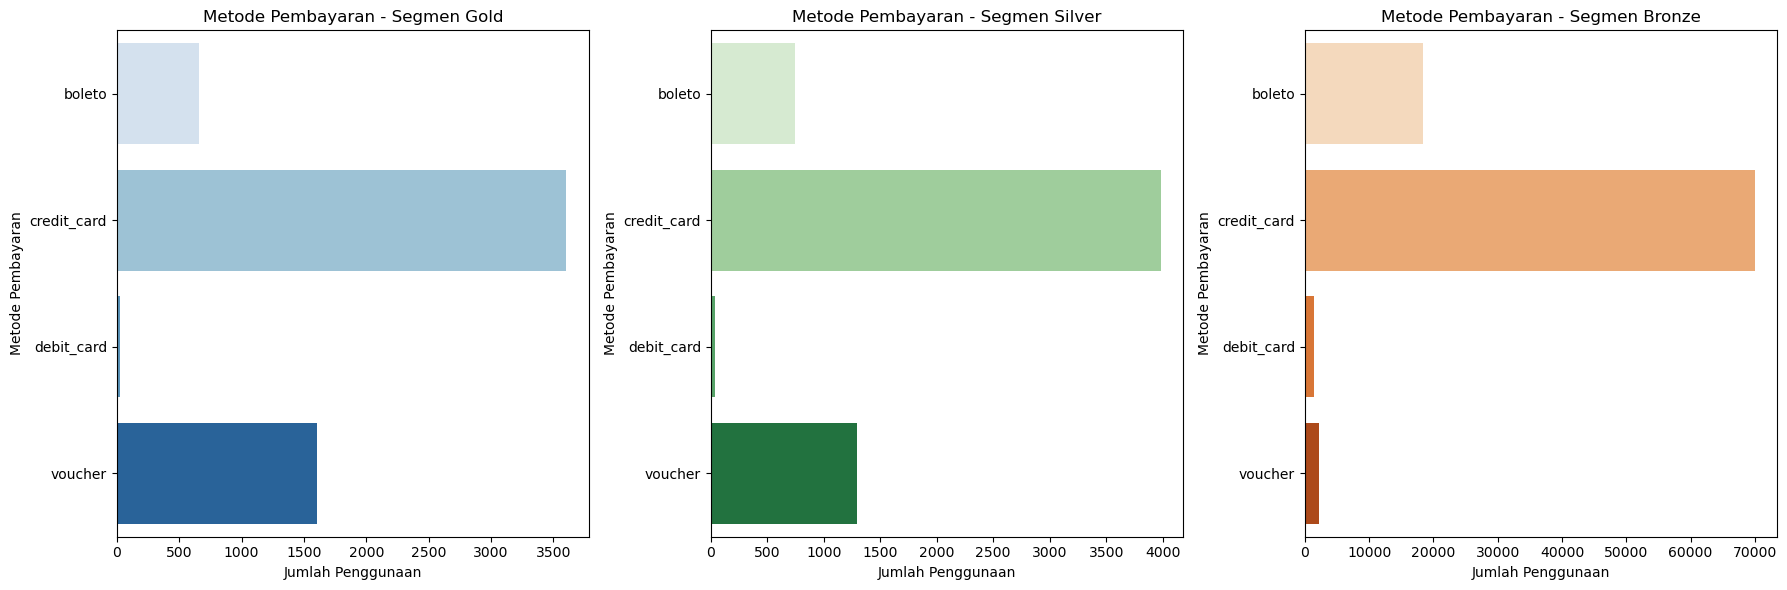

In [43]:
# Menggabungkan data RFM dengan payment_type
RFM_payment_method = pd.merge(RFM, merged_data[['customer_unique_id', 'payment_type']],
                        left_on='customer_unique_id', right_on='customer_unique_id', how='left')

# Menghitung jumlah penggunaan setiap metode pembayaran per segmen
payment_method_by_segment = RFM_payment_method.groupby(['segment', 'payment_type']) \
    .size().reset_index(name='count')

# Membuat plot dengan 1 baris 3 kolom untuk segmen Gold, Silver, dan Bronze
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot untuk segmen Gold
sns.barplot(x='count', y='payment_type', data=payment_method_by_segment[payment_method_by_segment['segment'] == 'Gold'],
            ax=axes[0], palette='Blues')
axes[0].set_title('Metode Pembayaran - Segmen Gold')
axes[0].set_xlabel('Jumlah Penggunaan')
axes[0].set_ylabel('Metode Pembayaran')

# Plot untuk segmen Silver
sns.barplot(x='count', y='payment_type', data=payment_method_by_segment[payment_method_by_segment['segment'] == 'Silver'],
            ax=axes[1], palette='Greens')
axes[1].set_title('Metode Pembayaran - Segmen Silver')
axes[1].set_xlabel('Jumlah Penggunaan')
axes[1].set_ylabel('Metode Pembayaran')

# Plot untuk segmen Bronze
sns.barplot(x='count', y='payment_type', data=payment_method_by_segment[payment_method_by_segment['segment'] == 'Bronze'],
            ax=axes[2], palette='Oranges')
axes[2].set_title('Metode Pembayaran - Segmen Bronze')
axes[2].set_xlabel('Jumlah Penggunaan')
axes[2].set_ylabel('Metode Pembayaran')

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, diketahui:

1. **Segmen Gold**:
   - Metode pembayaran yang paling banyak digunakan oleh pelanggan di segmen Gold adalah **credit card** (lebih dari 3500 penggunaan).
   - **Voucher** menempati posisi kedua dengan sekitar 1000 penggunaan.
   - **Boleto** juga digunakan, meskipun dengan frekuensi yang lebih rendah dibandingkan metode lainnya.
   - **Debit card** hanya memiliki sedikit penggunaan di segmen ini.

2. **Segmen Silver**:
   - Seperti segmen Gold, **credit card** tetap menjadi metode pembayaran yang paling banyak digunakan di segmen Silver (sekitar 3500 penggunaan).
   - **Voucher** juga memiliki penggunaan yang signifikan (sekitar 1000 penggunaan), sedikit lebih rendah dibandingkan segmen Gold.
   - **Boleto** dan **debit card** digunakan dengan frekuensi yang lebih rendah, dengan **Boleto** memiliki sedikit lebih banyak penggunaan daripada **debit card**.

3. **Segmen Bronze**:
   - Dalam segmen Bronze, **credit card** mendominasi secara signifikan dengan lebih dari 60.000 penggunaan.
   - **Voucher** dan **Boleto** memiliki beberapa ribu penggunaan, namun masih jauh di bawah penggunaan kartu kredit.
   - **Debit card** memiliki penggunaan yang sangat rendah di segmen ini.

Pertanyaan

### Pertanyaan 15: Bagaimana strategi pemasaran yang dapat dilakukan untuk meningkatkan penjualan produk yang kurang laku pada masing-masing segmen dalam waktu 6 bulan?

Berikut adalah strategi pemasaran untuk meningkatkan penjualan produk yang kurang laku pada masing-masing segmen **Gold**, **Silver**, dan **Bronze** dalam 6 bulan ke depan:

---

**1. Segmen Gold**

Pelanggan dalam segmen **Gold** adalah pelanggan dengan daya beli tinggi dan loyal. Namun, produk seperti **dvds_blu_ray**, **fashio_female_clothing**, dan **fashion_sport** masih kurang diminati.

**Strategi Pemasaran:**
- **Penawaran Eksklusif untuk Produk Premium**: Karena segmen ini lebih memilih produk premium dan metode pembayaran yang banyak digunakan adalah **credit card**, berikan diskon eksklusif untuk kategori seperti **dvds_blu_ray**. Berikan opsi cicilan **tanpa bunga** bagi pengguna kartu kredit untuk produk-produk mahal dan **bundle premium** yang menyertakan edisi terbatas untuk menarik minat lebih besar.
  
- **Bundling Produk Fashion dengan Diskon Kartu Kredit**: Kombinasikan kategori produk **fashio_female_clothing** dan **fashion_sport** dengan produk populer seperti **furniture_decor** dan tawarkan diskon tambahan saat menggunakan **credit card**. Bundling bisa menciptakan nilai lebih dan menarik pelanggan Gold dengan harga yang sesuai dengan daya beli mereka.

- **Event Khusus dengan Cashback untuk Kartu Kredit**: Mengadakan **“Gold Member Exclusive Sale”** dengan fokus pada kategori produk yang kurang laku, misalnya **fashion** dan **dvds_blu_ray**, di mana pembeli dapat memperoleh **cashback** jika mereka menggunakan kartu kredit, metode pembayaran yang paling populer di segmen ini. Hal ini dapat meningkatkan daya tarik untuk pembelian dalam kategori yang kurang diminati.

---

**2. Segmen Silver**

Segmen **Silver** memiliki daya beli yang baik tetapi sedikit lebih rendah daripada segmen Gold. Produk seperti **computers**, **cine_photo**, dan **flowers** kurang diminati.

**Strategi Pemasaran:**
- **Diskon dengan Cicilan Kartu Kredit**: Karena **credit card** adalah metode pembayaran yang paling populer di segmen Silver, tawarkan diskon besar untuk kategori **computers** dan **cine_photo**, serta berikan opsi cicilan **0%** menggunakan kartu kredit. Ini dapat membantu mengatasi hambatan harga dan meningkatkan daya tarik pembelian produk-produk teknologi.

- **Program Loyalitas dengan Voucher**: Meluncurkan program **loyalitas berbasis voucher** yang memberikan poin untuk setiap pembelian produk **flowers** atau **cine_photo**, dengan potongan harga tambahan pada pembelian berikutnya. Karena penggunaan **voucher** cukup tinggi di segmen ini, strategi ini dapat memotivasi pelanggan untuk membeli produk yang kurang diminati.

- **Kampanye Hadiah dan Dekorasi Rumah**: Luncurkan kampanye "Bawa Pulang Kesenangan" untuk kategori seperti **flowers** dan **la_cuisine**, dengan penawaran khusus di mana pembelian **menggunakan kartu kredit** mendapatkan voucher tambahan untuk pembelian berikutnya. Buatlah produk-produk ini lebih terjangkau dengan memberikan insentif untuk pembayaran berbasis **boletos** yang juga cukup populer di segmen Silver.

---

**3. Segmen Bronze**

Segmen **Bronze** memiliki daya beli yang lebih rendah dan sering menggunakan **voucher** dan **credit card** untuk melakukan pembelian. Produk seperti **home_comfort_2**, **cds_dvds_musicals**, dan **la_cuisine** kurang diminati di segmen ini.

**Strategi Pemasaran:**
- **Promosi Voucher untuk Produk Rumah Tangga**: Gunakan metode pembayaran populer seperti **voucher** dan **credit card** untuk memberikan diskon besar pada kategori **home_comfort_2**. Kampanye "Best Value for Your Home" bisa menarik pelanggan Bronze yang cenderung sensitif terhadap harga.

- **Penawaran Khusus untuk Produk Hiburan**: **cds_dvds_musicals** dapat dipasarkan sebagai bagian dari promosi "Beli 1 Gratis 1" atau **bundling**. Tawarkan diskon lebih lanjut jika menggunakan **voucher** atau **kartu kredit**, metode yang paling banyak digunakan oleh segmen Bronze.

- **Fokus pada Kenyamanan dan Efisiensi**: Pasarkan **la_cuisine** melalui kampanye yang menyoroti **kenyamanan dan efisiensi** di rumah. Berikan diskon tambahan untuk produk ini jika pelanggan menggunakan **voucher** atau berikan cashback untuk pembelian dengan **credit card**, sehingga meningkatkan aksesibilitas produk.

---

**Rencana Implementasi 6 Bulan:**
1. **Bulan 1-2**:
   - Lakukan segmentasi pelanggan dan identifikasi produk yang kurang laku. Luncurkan kampanye penawaran eksklusif dengan **metode pembayaran populer** (kartu kredit, voucher) untuk kategori produk tersebut.
   - Fokus pada program loyalitas berbasis **voucher** di segmen Bronze dan Silver serta bundling produk di segmen Gold.

2. **Bulan 3-4**:
   - Tingkatkan penawaran cicilan **0%** untuk segmen Gold dan Silver dengan pembayaran kartu kredit, terutama untuk kategori **electronics** dan produk premium lainnya.
   - Evaluasi hasil kampanye voucher dan cicilan. Lakukan penyesuaian berdasarkan tren pembayaran dan pembelian.

3. **Bulan 5-6**:
   - Adakan event promosi eksklusif seperti **“Gold Member Exclusive Sale”** untuk segmen Gold dan **kampanye diskon** untuk segmen Bronze dan Silver. Fokus pada peningkatan pembelian produk **fashion**, **home_comfort_2**, dan **flowers**.
   - Gunakan data analisis metode pembayaran untuk memperluas penggunaan **voucher** dan **boletos** bagi pelanggan yang lebih sensitif terhadap harga.

---

Dengan strategi ini, fokus pada metode pembayaran yang disukai oleh pelanggan di setiap segmen dapat digunakan untuk meningkatkan daya tarik produk yang kurang laku dan mendorong lebih banyak transaksi.

## Conclusion

1. Bagaimana tren volume penjualan dari waktu ke waktu (bulanan/tahunan)?
    Penjualan mengalami pertumbuhan yang pesat pada awal tahun 2017 dan mencapai puncaknya pada November 2017, yang kemungkinan besar terkait dengan promosi seperti Black Friday. Setelah itu, meskipun ada sedikit penurunan, volume penjualan tetap stabil hingga akhir 2017 dan awal 2018, dengan tren yang konsisten sepanjang pertengahan tahun 2018. Ini menunjukkan pola musiman dalam penjualan, dengan lonjakan besar pada akhir tahun yang mungkin didorong oleh promosi atau periode belanja khusus.

---

2. Bagaimana tren volume penjualan dari waktu ke waktu (Mingguan/Harian)?
    Hari Senin dan Selasa merupakan hari dengan volume penjualan tertinggi dalam seminggu, sementara akhir pekan mengalami penurunan penjualan, terutama pada hari Sabtu. Dari segi waktu dalam sehari, penjualan mencapai puncaknya pada siang hari, diikuti oleh penjualan yang masih tinggi pada sore hari, sementara penjualan pagi dan malam jauh lebih rendah, dengan malam hari memiliki jumlah order paling sedikit. Hal ini menunjukkan bahwa pelanggan cenderung lebih aktif berbelanja pada hari kerja dan waktu siang hingga sore.

---

3. Bagaimana rata-rata skor rating per kategori produk dari pelanggan?
- Kategori fashion_childrens_clothes mendapat skor ulasan tertinggi, menunjukkan tingkat kepuasan pelanggan yang tinggi. Produk di kategori seperti CDs_dvds_musicals, books_imported, dan food_drink juga dinilai positif, yang mungkin disebabkan oleh kualitas yang baik dan kesesuaian dengan harapan pelanggan.
- Di sisi lain, kategori security_and_services mencatat skor ulasan terendah, yang mengindikasikan ketidakpuasan pelanggan, mungkin terkait dengan kualitas layanan atau produk. Kategori lain seperti office_furniture, fashion_male_clothing, dan home_comfort_2 juga mengalami ulasan rendah, menunjukkan adanya potensi masalah dalam kualitas, pengiriman, atau ketidaksesuaian dengan ekspektasi pelanggan.

---

4. Apakah Harga Produk, Biaya Pengiriman, Waktu Pengiriman, Metode Pembayaran dan Frekuensi Pembelian mempengaruhi skor ulasan?
    Harga produk dan biaya pengiriman tidak memiliki korelasi signifikan dengan skor ulasan pelanggan, yang berarti kedua faktor tersebut tidak menjadi penentu utama dalam penilaian pelanggan. Namun, waktu pengiriman yang lebih lama cenderung memengaruhi skor ulasan, dengan ulasan lebih rendah untuk pengiriman yang melebihi 50 hari. 
    Metode pembayaran juga tidak menunjukkan perbedaan yang signifikan dalam ulasan, dengan mayoritas pelanggan memberikan skor ulasan yang konsisten terlepas dari metode pembayaran yang digunakan. Di sisi lain, frekuensi pembelian menunjukkan bahwa pelanggan yang lebih sering berbelanja cenderung memberikan ulasan yang lebih baik, meskipun terdapat beberapa pengecualian.
  
---

5. Kategori produk mana yang paling laris? Dan mana yang kurang laku?
- Kategori bed_bath_table, health_beauty, dan sports_leisure merupakan produk terlaris, terutama barang-barang kebutuhan rumah tangga dan teknologi yang menunjukkan permintaan tinggi. Produk seperti furniture_decor dan housewares juga sangat populer, yang menunjukkan tingginya permintaan untuk barang-barang fungsional rumah tangga.

- Sebaliknya, kategori dengan penjualan terendah adalah fashion_female_clothing, yang mengejutkan mengingat biasanya produk fashion cukup populer, menunjukkan potensi masalah pemasaran atau persaingan yang ketat. Kategori seperti flowers, fashion_sport, dan diapers_and_hygiene juga mengalami penjualan yang rendah, yang mungkin disebabkan oleh ulasan buruk atau kurangnya minat konsumen. Security_and_services mencatat penjualan terendah, mungkin karena sifat produknya yang lebih khusus dan dibutuhkan oleh segmen pasar yang terbatas.

---

6. Bagaimana rata-rata harga per kategori produk?
- Kategori dengan harga rata-rata tertinggi didominasi oleh produk teknologi dan peralatan rumah tangga, seperti computers, small_appliances_home_oven_and_coffee, dan home_appliances_2, yang wajar mengingat produk-produk ini memiliki nilai guna tinggi, kompleksitas teknologi, dan kualitas yang lebih mahal. Kategori construction_tools_safety dan furniture_bedroom juga memiliki harga tinggi karena barang-barang ini sering kali dianggap sebagai investasi jangka panjang.

- Sebaliknya, kategori dengan harga rata-rata terendah adalah fashion_female_clothing, yang kemungkinan disebabkan oleh persaingan ketat atau kualitas yang lebih rendah. Produk food_drink dan diapers_and_hygiene juga memiliki harga rendah karena sifatnya yang sering dikonsumsi dan dibeli dalam jumlah besar. Kategori lain dengan harga rendah, seperti flowers dan cds_dvds_musicals, mungkin dipengaruhi oleh kualitas atau tren konsumen yang berubah, mengurangi daya tarik dan nilai jual produk.
---
7. Bagaimana rata-rata biaya pengiriman per kategori produk?
- Kategori dengan biaya pengiriman tertinggi terdiri dari produk berukuran besar dan berat, seperti computers, home_appliances_2, furniture_bedroom, dan furniture_living_room, yang memerlukan penanganan khusus dan biaya pengiriman yang lebih tinggi karena ukurannya. Produk seperti luggage_accessories dan industry_commerce_and_business juga memiliki biaya pengiriman tinggi karena dimensi dan beratnya yang lebih besar.

- Sebaliknya, kategori dengan biaya pengiriman terendah adalah fashion_childrens_clothes, yang cenderung ringan dan mudah dikemas. Kategori lain seperti books_imported dan home_comfort_2 juga memiliki biaya pengiriman yang rendah karena ukurannya yang kecil dan mudah dikirim. Meskipun flowers memiliki biaya pengiriman yang rendah, kualitas pengiriman mungkin perlu diperhatikan untuk memastikan produk tiba dalam kondisi baik. Produk kecil seperti tablets_printing_image dan arts_and_craftmanship juga termasuk dalam kategori dengan biaya pengiriman yang rendah.
---
8. Apakah terdapat korelasi antara waktu pengiriman dan rating ulasan yang diberikan?
    Ada hubungan yang jelas antara durasi pengiriman dan kepuasan pelanggan. Rata-rata waktu pengiriman untuk ulasan buruk adalah 18,96 hari, jauh lebih lama dibandingkan ulasan baik yang rata-rata hanya 10,97 hari. Ini menunjukkan bahwa pelanggan yang menerima pengiriman lebih lambat cenderung memberikan ulasan buruk.

    Distribusi waktu pengiriman juga memperkuat hal ini, di mana ulasan buruk memiliki rentang yang lebih luas dan lebih banyak outlier, dengan beberapa pengiriman melebihi 100 hari, yang mungkin menjadi faktor utama ketidakpuasan. Sebaliknya, ulasan baik biasanya diberikan ketika pengiriman lebih cepat, dengan waktu pengiriman di bawah 50 hari, dan distribusi yang lebih konsisten. Ini menunjukkan bahwa kecepatan pengiriman sangat memengaruhi persepsi pelanggan terhadap layanan.
  
---

9. Kategori produk mana yang memiliki waktu pengiriman terlama?
- Beberapa kategori, seperti office_furniture, christmas_supplies, dan security_and_services, memiliki waktu pengiriman rata-rata yang paling lama, dengan office_furniture mencapai sekitar 20 hari. Produk-produk ini mungkin memerlukan waktu lebih lama untuk diproses dan dikirim karena ukurannya yang besar atau proses penanganan yang lebih rumit.
- Produk elektronik dan furnitur, seperti furniture_living_room, furniture_mattress_and_upholstery, dan computers, juga mengalami pengiriman yang lebih lama, kemungkinan karena logistik yang lebih kompleks dan kebutuhan penanganan khusus. Kategori mode seperti fashion_underwear_beach dan fashion_shoes juga menunjukkan waktu pengiriman yang lebih lama, yang mungkin terkait dengan asal produk atau proses produksi khusus.
- Christmas_supplies juga termasuk kategori dengan pengiriman yang lambat, mungkin karena permintaan musiman yang tinggi menjelang liburan, yang dapat menyebabkan keterbatasan kapasitas logistik selama periode sibuk.

---

10. Bagaimana mengelompokkan pelanggan dengan menggunakan RFM Analysis?
    Pengelompokan RFM  dibagi menjadi tiga segmen utama: Gold, Silver, dan Bronze, berdasarkan kombinasi nilai Recency (waktu pembelian terakhir), Frequency (seberapa sering mereka membeli), dan Monetary (nilai pengeluaran). Segmen Gold terdiri dari pelanggan yang baru-baru ini melakukan pembelian, sering berbelanja, dan memiliki pengeluaran tinggi, menjadikannya segmen paling bernilai. Segmen Silver mencakup pelanggan dengan frekuensi dan nilai belanja sedang, sementara segmen Bronze berisi pelanggan dengan frekuensi dan pengeluaran yang rendah atau mereka yang sudah lama tidak melakukan pembelian. Strategi pemasaran dapat difokuskan pada peningkatan loyalitas pelanggan di segmen Bronze untuk meningkatkan mereka ke segmen Silver atau Gold.

    Hal ini menandakan adanya peluang besar untuk meningkatkan nilai pelanggan di segmen Bronze, misalnya dengan menerapkan strategi pemasaran yang mendorong frekuensi pembelian lebih tinggi dan meningkatkan nilai transaksi, sehingga pelanggan dapat naik ke segmen Silver atau Gold. Selain itu, segmen Gold dan Silver harus tetap dijaga dengan program loyalitas atau penawaran eksklusif untuk mempertahankan pelanggan-pelanggan bernilai tinggi ini, memastikan mereka terus berbelanja dengan frekuensi dan nilai yang tinggi.

---

11. Bagaimana tren volume penjualan dari waktu ke waktu (bulanan/tahunan) antar segmen pelanggan?
    Segmen Bronze mendominasi dalam hal jumlah order, dengan pertumbuhan pesat dari awal 2017 hingga mencapai puncaknya pada November 2017. Meskipun ada sedikit penurunan pada akhir 2017, segmen ini tetap stabil dan menunjukkan jumlah pesanan yang lebih tinggi daripada segmen lain. Segmen Gold memiliki jumlah order yang lebih kecil tetapi stabil, tanpa pertumbuhan signifikan. Pelanggan di segmen ini cenderung setia, dan ada peluang untuk peningkatan dengan strategi pemasaran yang tepat. Segmen Silver menunjukkan peningkatan yang lambat namun stabil, tetapi terjadi penurunan signifikan pada April 2018, yang mungkin menunjukkan adanya masalah atau kurangnya promosi yang efektif untuk segmen ini.

---

12. Kategori produk mana yang paling laku berdasarkan segmen pelanggan?
    Kategori bed_bath_table adalah produk yang paling sering dibeli di semua segmen, yaitu Gold, Silver, dan Bronze, meskipun segmen Bronze memiliki volume pembelian yang lebih tinggi.

- Untuk segmen Gold, pelanggan memiliki preferensi kuat terhadap furniture_decor, sports_leisure, serta health_beauty, yang menunjukkan minat terhadap produk rumah tangga dan kesehatan.
  
- Segmen Silver menunjukkan pola konsumsi yang mirip, namun ada minat tambahan terhadap produk teknologi, seperti computers_accessories.

- Di segmen Bronze, selain bed_bath_table, kategori seperti computers_accessories dan furniture_decor menunjukkan volume pembelian yang lebih tinggi, meskipun pelanggan ini memiliki nilai RFM yang lebih rendah. Kesimpulannya, meski segmen Bronze dianggap kurang bernilai, mereka masih memberikan kontribusi besar dalam volume penjualan produk-produk tertentu, terutama produk rumah tangga dan teknologi.
---
13. Kategori produk mana yang kurang laku berdasarkan segmen pelanggan?
- Pelanggan segmen Gold memiliki daya beli tinggi, mereka cenderung tidak tertarik pada produk dvds_blu_ray, fashio_female_clothing, dan fashion_sport, yang memiliki jumlah pembelian paling rendah. Kategori seperti home_comfort_2 dan industry_commerce_and_business juga tidak sejalan dengan minat pelanggan Gold.

- Di segmen Silver, produk computers memiliki pembelian paling sedikit, menunjukkan bahwa pelanggan segmen ini kurang tertarik pada produk teknologi tinggi. Selain itu, kategori seperti cine_photo, flowers, dan la_cuisine juga tidak diminati oleh pelanggan Silver.

- Untuk segmen Bronze, kategori home_comfort_2 mencatat pembelian terendah, yang mungkin disebabkan oleh harga yang lebih tinggi atau kurang relevansi dengan preferensi mereka. Produk hiburan seperti cds_dvds_musicals dan peralatan dapur di kategori la_cuisine juga kurang diminati, bersama dengan produk fashion_childrens_clothes dan security_and_services, yang mungkin karena keterbatasan daya beli pelanggan Bronze.

---

14. Metode Pembayaran apa yang paling banyak digunakan berdasarkan segmen pelanggan?
    Credit card adalah metode pembayaran yang paling banyak digunakan di semua segmen, baik Gold, Silver, maupun Bronze. Pelanggan di segmen Gold dan Silver menggunakan credit card dengan frekuensi yang hampir sama, sekitar 3500 kali, sementara voucher dan boleto juga digunakan meskipun dalam jumlah yang jauh lebih kecil. Debit card hanya digunakan oleh sedikit pelanggan di kedua segmen tersebut.

    Di segmen Bronze, credit card mendominasi dengan lebih dari 60.000 penggunaan, jauh melebihi metode pembayaran lainnya. Voucher dan boleto juga digunakan, namun dengan frekuensi yang jauh lebih rendah. Debit card hampir tidak digunakan dalam segmen ini. Secara keseluruhan, credit card merupakan metode pembayaran pilihan utama di semua segmen, sementara voucher dan boleto memainkan peran sekunder.

---

15. Bagaimana strategi pemasaran yang dapat dilakukan untuk meningkatkan penjualan produk yang kurang laku pada masing-masing segmen dalam waktu 6 bulan?
    Strategi pemasaran yang dirancang untuk masing-masing segmen Gold, Silver, dan Bronze bertujuan untuk meningkatkan penjualan produk yang kurang diminati dengan memanfaatkan metode pembayaran yang paling sering digunakan oleh pelanggan di setiap segmen.
- Segmen Gold:
  Strategi untuk segmen ini fokus pada pelanggan dengan daya beli tinggi, seperti penawaran eksklusif dan bundling untuk kategori dvds_blu_ray, fashio_female_clothing, dan fashion_sport, yang kurang diminati. Dengan memanfaatkan credit card sebagai metode pembayaran utama dan penawaran cicilan 0%, pelanggan dapat lebih tertarik untuk membeli produk premium.
- Segmen Silver:
  Segmen Silver cenderung memilih credit card dan voucher. Strategi pemasaran berfokus pada pemberian diskon besar dan program loyalitas untuk kategori seperti computers, cine_photo, dan flowers, yang kurang diminati. Penawaran cicilan 0% dan program poin berbasis voucher dapat meningkatkan ketertarikan terhadap produk ini.
- Segmen Bronze:
    Untuk segmen Bronze yang lebih sensitif terhadap harga, strategi berfokus pada penggunaan voucher dan credit card untuk memberikan promosi diskon besar pada kategori home_comfort_2, cds_dvds_musicals, dan la_cuisine. Promosi bundling, cashback, dan kampanye berbasis kenyamanan di rumah dapat membantu meningkatkan minat terhadap kategori yang kurang laku.

    Rencana implementasi selama 6 bulan mencakup peluncuran kampanye eksklusif, penawaran cicilan, dan evaluasi kampanye secara berkala untuk memastikan peningkatan penjualan pada kategori produk yang kurang diminati di setiap segmen.